Questo codice parte da Pattern_mining_prova_durata_titletype e tenta di dividere i generi quando ne è presente più di uno per uno stesso elemento

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\tomma\AppData\Local\Temp\ipykernel_19368\2786719680.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [74]:
df = pd.read_csv("train_log.csv")

In [75]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147
1,Looping,"(5, 6]",1982,28,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683


In [76]:
# Raggruppa i dati per 'titleType' e calcola la durata media
durata_media_per_titletype = df.groupby('titleType')['runtimeMinutes'].mean()

# Mostra il risultato
print(durata_media_per_titletype)


titleType
movie            92.740797
short            13.493827
tvEpisode        40.220651
tvMiniSeries    124.090909
tvMovie          81.049822
tvSeries         50.222818
tvShort           9.375000
tvSpecial        82.533784
video            71.577778
videoGame        28.000000
Name: runtimeMinutes, dtype: float64


In [77]:
count = df['numRegions'].value_counts()
pd.set_option('display.max_rows', None)  # None per mostrare tutte le righe
print(count)
pd.reset_option('display.max_rows')  # Resetta il numero di righe mostrate

numRegions
1     9247
2     1805
3      850
7      747
4      707
5      490
6      367
8      201
9      166
10     143
12     132
11     120
13      92
14      86
15      70
16      64
19      56
17      50
20      47
21      40
18      38
23      35
22      33
25      32
27      27
24      27
26      26
31      21
29      19
32      18
28      15
30      14
36      13
33      12
34      12
35      10
45       8
41       7
46       7
43       7
40       7
37       7
44       6
39       5
54       4
47       4
52       4
42       4
49       4
48       4
51       3
56       3
38       3
57       2
69       1
53       1
58       1
62       1
Name: count, dtype: int64


In [78]:
# Seleziona le colonne numeriche del DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Calcola la percentuale di valori 0 per ogni colonna numerica
percent_zero = (df[numeric_columns] == 0).mean() * 100

# Stampa il risultato
print(percent_zero)


startYear          0.000000
runtimeMinutes     0.006279
awardWins         88.596546
numVotes           0.000000
totalImages       19.529042
totalVideos       89.996860
totalCredits       0.000000
AwNmExWins        87.566719
numRegions         0.000000
ratingMean         0.000000
ReviewsTotal      47.968603
dtype: float64


In [79]:
df['rating'].unique()

array(['(7, 8]', '(5, 6]', '(8, 9]', '(6, 7]', '(2, 3]', '(4, 5]',
       '(9, 10]', '(3, 4]', '(0, 1]', '(1, 2]'], dtype=object)

In [80]:
# Mappatura degli intervalli in categorie
rating_mapping = {
    '(0, 1]': 'very_low_rated',
    '(1, 2]': 'very_low_rated',
    '(2, 3]': 'very_low_rated',
    '(3, 4]': 'very_low_rated',
    '(4, 5]': 'low_rated',
    '(5, 6]': 'low_rated',
    '(6, 7]': 'good_rated',
    '(7, 8]': 'good_rated',
    '(8, 9]': 'high_rated',
    '(9, 10]': 'high_rated'
}

# Applicare la mappatura
df['rating_group'] = df['rating'].map(rating_mapping)

In [81]:
# Calcolo del numero di virgole per ogni riga nella colonna 'countryOfOrigin'
df['number_of_countries'] = df['countryOfOrigin'].apply(lambda x: x.count(',')+1)
df['more_than_one_country'] = df['number_of_countries'].apply(lambda x: 1 if x > 1 else 0)

del df['number_of_countries']

surv_dict = {0: "1_country", 1: "more_than_1_country"}
df["more_than_one_country"] = df["more_than_one_country"].map(surv_dict)

df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,rating_group,more_than_one_country
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147,good_rated,1_country
1,Looping,"(5, 6]",1982,28,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000,low_rated,1_country
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147,low_rated,1_country
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000,low_rated,1_country
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683,good_rated,1_country


In [82]:
# remove useless variables
column2drop = ["originalTitle", "AwNmExWins", "ratingMean", "totalVideos","rating"]
df.drop(column2drop, axis=1, inplace=True)
df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,titleType,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ReviewsTotal,rating_group,more_than_one_country
0,1995,40,0.000000,6.659294,0.693147,21,tvEpisode,False,False,1,['US'],"Action,Adventure,Animation",0.693147,good_rated,1_country
1,1982,28,0.000000,2.484907,0.693147,1,videoGame,False,False,1,['XWG'],Action,0.000000,low_rated,1_country
2,1992,92,0.000000,3.663562,0.693147,24,movie,False,False,1,['RU'],Comedy,0.693147,low_rated,1_country
3,2021,53,0.000000,2.772589,3.135494,56,tvSeries,True,False,1,['MX'],Reality-TV,0.000000,low_rated,1_country
4,2020,80,0.693147,9.662625,5.852202,47,tvSeries,True,False,32,['KR'],"Comedy,Drama,Romance",6.124683,good_rated,1_country


In [83]:
# mapping = {
#     'short': 'short',
#     'tvShort': 'short',
#     'movie': 'movie',
#     'tvMovie': 'movie',
#     'tvSpecial': 'special',
#     'videogame': 'videogame',
#     'video': 'video',
#     'tvMiniSeries': 'tvseries_related',
#     'tvSeries': 'tvseries_related',
#     'tvEpisode': 'tvseries_related'
# }

# df['grouped_titleType'] = df['titleType'].replace(mapping)
# del df['titleType']

mapping = {
    'short': 'short',
    'tvShort': 'short',
    'movie': 'movie',
    'tvMovie': 'movie',
    'tvSpecial': 'other',
    'videoGame': 'other',
    'video': 'other',
    'tvMiniSeries': 'tvseries_related',
    'tvSeries': 'tvseries_related',
    'tvEpisode': 'tvseries_related'
}

df['grouped_titleType'] = df['titleType'].replace(mapping)
del df['titleType']

In [84]:
# Raggruppa i dati per 'titleType' e calcola la durata media
durata_media_per_titletype = df.groupby('grouped_titleType')['runtimeMinutes'].mean()

# Mostra il risultato
print(durata_media_per_titletype)


grouped_titleType
movie               91.135668
other               64.579505
short               13.427126
tvseries_related    45.168365
Name: runtimeMinutes, dtype: float64


In [85]:
# Mappare i generi in 4 categorie equilibrate
genre_mapping = {
    'Action': 'genre_Action/Adventure',
    'Adventure': 'genre_Action/Adventure',
    'Thriller': 'genre_Action/Adventure',
    'Sci-Fi': 'genre_Action/Adventure',
    'Horror': 'genre_Action/Adventure',
    'Fantasy': 'genre_Action/Adventure',
    
    'Drama': 'genre_Drama/Crime',
    'Crime': 'genre_Drama/Crime',
    'Mystery': 'genre_Drama/Crime',
    'War': 'genre_Drama/Crime',
    'Film-Noir': 'genre_Drama/Crime',
    
    'Comedy': 'genre_Comedy/Family',
    'Family': 'genre_Comedy/Family',
    'Romance': 'genre_Comedy/Family',
    'Animation': 'genre_Comedy/Family',
    'Musical': 'genre_Comedy/Family',
    'Short': 'genre_Comedy/Family',
    
    'Documentary': 'genre_Doc/Others',
    'Biography': 'genre_Doc/Others',
    'Reality-TV': 'genre_Doc/Others',
    'History': 'genre_Doc/Others',
    'News': 'genre_Doc/Others',
    'Talk-Show': 'genre_Doc/Others',
    'Music': 'genre_Doc/Others',
    'Sport': 'genre_Doc/Others',
    'Game-Show': 'genre_Doc/Others',
    'Western': 'genre_Doc/Others',
    'Adult': 'genre_Doc/Others'
}

# Funzione per mappare i generi in categorie
def map_genres(genres_str, genre_mapping):
    # Split dei generi in una lista (separati da virgola)
    genres = genres_str.split(',')
    
    # Mappiamo ogni genere alla sua categoria (usando la mappatura)
    mapped_genres = set([genre_mapping.get(genre, 'Altro') for genre in genres])
    
    # Uniamo le categorie mappate in una stringa separata da virgola
    return ', '.join(sorted(mapped_genres))

# Applicare la funzione alla colonna 'genres'
df['mapped_genres'] = df['genres'].apply(lambda x: map_genres(x, genre_mapping))

del df['genres']

# Visualizzare il risultato
df.head()


,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,ReviewsTotal,rating_group,more_than_one_country,grouped_titleType,mapped_genres
0,1995,40,0.000000,6.659294,0.693147,21,False,False,1,['US'],0.693147,good_rated,1_country,tvseries_related,"genre_Action/Adventure, genre_Comedy/Family"
1,1982,28,0.000000,2.484907,0.693147,1,False,False,1,['XWG'],0.000000,low_rated,1_country,other,genre_Action/Adventure
2,1992,92,0.000000,3.663562,0.693147,24,False,False,1,['RU'],0.693147,low_rated,1_country,movie,genre_Comedy/Family
3,2021,53,0.000000,2.772589,3.135494,56,True,False,1,['MX'],0.000000,low_rated,1_country,tvseries_related,genre_Doc/Others
4,2020,80,0.693147,9.662625,5.852202,47,True,False,32,['KR'],6.124683,good_rated,1_country,tvseries_related,"genre_Comedy/Family, genre_Drama/Crime"


In [86]:
# Separare i generi e ottenere i generi unici
generi_singoli = df['mapped_genres'].dropna().apply(lambda x: x.split(','))

# Espandere la lista di generi in un'unica lista
tutti_i_generi = [genere.strip() for sublist in generi_singoli for genere in sublist]

# Determinare i generi distinti
generi_distinti = set(tutti_i_generi)

# Contare i generi distinti
numero_generi_distinti = len(generi_distinti)

print(f"I generi distinti sono: {generi_distinti}")
print(f"Il numero di generi distinti è: {numero_generi_distinti}")

I generi distinti sono: {'genre_Drama/Crime', 'genre_Doc/Others', 'genre_Comedy/Family', 'genre_Action/Adventure'}
Il numero di generi distinti è: 4


In [87]:

# Contare le occorrenze di ogni genere
conteggio_generi = {genere: tutti_i_generi.count(genere) for genere in generi_distinti}

print("Occorrenze di ogni genere:")
for genere, conteggio in conteggio_generi.items():
    print(f"{genere}: {conteggio}")

Occorrenze di ogni genere:
genre_Drama/Crime: 6699
genre_Doc/Others: 4147
genre_Comedy/Family: 8645
genre_Action/Adventure: 4440


In [88]:
# Creare colonne binarie per ogni genere distinto
# for genere in generi_distinti:
#     df[genere] = df['mapped_genres'].apply(lambda x: int(genere in x.split(', ')) if pd.notna(x) else 0)


from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_dummies = pd.DataFrame(
    mlb.fit_transform(df['mapped_genres'].apply(lambda x: x.split(', '))),
    columns=mlb.classes_,
    index=df.index
)

del df['mapped_genres']

# Concatenare tutto in un unico DataFrame binarizzato
df = pd.concat([df, genres_dummies], axis=1)



# del df['mapped_genres']

pd.set_option('display.max_columns', None)

# Mostra le prime righe del DataFrame aggiornato
df.head()

# Se vuoi ripristinare le impostazioni originali dopo
# pd.reset_option('display.max_columns')

# Visualizzare il DataFrame aggiornato
#df_train.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,ReviewsTotal,rating_group,more_than_one_country,grouped_titleType,genre_Action/Adventure,genre_Comedy/Family,genre_Doc/Others,genre_Drama/Crime
0,1995,40,0.000000,6.659294,0.693147,21,False,False,1,['US'],0.693147,good_rated,1_country,tvseries_related,1,1,0,0
1,1982,28,0.000000,2.484907,0.693147,1,False,False,1,['XWG'],0.000000,low_rated,1_country,other,1,0,0,0
2,1992,92,0.000000,3.663562,0.693147,24,False,False,1,['RU'],0.693147,low_rated,1_country,movie,0,1,0,0
3,2021,53,0.000000,2.772589,3.135494,56,True,False,1,['MX'],0.000000,low_rated,1_country,tvseries_related,0,0,1,0
4,2020,80,0.693147,9.662625,5.852202,47,True,False,32,['KR'],6.124683,good_rated,1_country,tvseries_related,0,1,0,1


In [89]:
df['number_of_us'] = df['countryOfOrigin'].apply(lambda x: x.count('US'))
df['produced_in_USA'] = df['number_of_us'].apply(lambda x: 1 if x > 0 else 0)
del df['number_of_us']

surv_dict = {0: "Not US", 1: "US"}
df["produced"] = df["produced_in_USA"].map(surv_dict)
del df['countryOfOrigin']
del df["produced_in_USA"]

df.head()


,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,canHaveEpisodes,isAdult,numRegions,ReviewsTotal,rating_group,more_than_one_country,grouped_titleType,genre_Action/Adventure,genre_Comedy/Family,genre_Doc/Others,genre_Drama/Crime,produced
0,1995,40,0.000000,6.659294,0.693147,21,False,False,1,0.693147,good_rated,1_country,tvseries_related,1,1,0,0,US
1,1982,28,0.000000,2.484907,0.693147,1,False,False,1,0.000000,low_rated,1_country,other,1,0,0,0,Not US
2,1992,92,0.000000,3.663562,0.693147,24,False,False,1,0.693147,low_rated,1_country,movie,0,1,0,0,Not US
3,2021,53,0.000000,2.772589,3.135494,56,True,False,1,0.000000,low_rated,1_country,tvseries_related,0,0,1,0,Not US
4,2020,80,0.693147,9.662625,5.852202,47,True,False,32,6.124683,good_rated,1_country,tvseries_related,0,1,0,1,Not US


In [90]:
df["Year_bin"] = pd.cut(df["startYear"], 5)
df["runtime_bin"] = pd.qcut(df["runtimeMinutes"], 4)
df["Votes_bin"] = pd.qcut(df["numVotes"], 4)
#df["Images_bin"] = pd.cut(df["totalImages"], 4)
df["Credits_bin"] = pd.qcut(df["totalCredits"], 4)
#df["regions_bin"] = pd.cut(df["numRegions"], 4)

# df["Videos_bin"] = pd.cut(df["totalVideos"], 4)
# df["Reviews_bin"] = pd.cut(df["ReviewsTotal"], 4)


#IN CASO DI DIVISIONE CON CUT

# # Step 1: Filtrare i valori diversi da 0 per creare intervalli equispaziati
# non_zero_values = df[df["totalImages"] != 0]["totalImages"]

# # Step 2: Creare 3 intervalli equispaziati per i valori non uguali a 0, ottenendo anche i bordi
# intervals, bins = pd.cut(non_zero_values, bins=3, include_lowest=True, retbins=True)

# # Step 3: Creare i bordi finali degli intervalli, includendo 0 nel primo intervallo
# final_bins = [-float('inf'), 0] + list(bins[1:])

# # Step 4: Creare una nuova colonna "totalImages_bin" con i nuovi intervalli
# df["Images_bin"] = pd.cut(df["totalImages"], bins=final_bins)

#IN CASO DI DIVISIONE CON CUT

# Step 1: Separare gli elementi uguali a 1
df["is_one"] = df["numRegions"] == 1

# Step 2: Creare i bin automaticamente con pd.cut per valori > 1
num_bins = 3  # Numero di intervalli da creare
cut_bins = pd.cut(df.loc[~df["is_one"], "numRegions"], bins=num_bins)

# Step 3: Etichettare manualmente la categoria "1"
df["regions_bin"] = pd.cut(
    df["numRegions"],  # Applichiamo pd.cut su tutta la colonna
    bins=[-np.inf, 1] + list(cut_bins.cat.categories.right),  # Aggiungiamo manualmente il primo bin
    labels=["1"] + list(cut_bins.cat.categories),  # Etichetta manuale per la categoria "1"
    include_lowest=True,
)

# Step 4: Rimuovere la colonna temporanea "is_one"
df.drop(columns=["is_one"], inplace=True)

#IN CASO DI DIVISIONE CON QCUT

# Step 1: Filtrare i valori diversi da 0 per creare intervalli basati su quantili
non_zero_values = df[df["totalImages"] != 0]["totalImages"]

# Step 2: Creare 3 intervalli equispaziati per i valori non uguali a 0 usando qcut, ottenendo anche i bordi
intervals, bins = pd.qcut(non_zero_values, q=4, retbins=True, labels=False, duplicates='drop')

# Step 3: Creare i bordi finali degli intervalli, includendo 0 nel primo intervallo
final_bins = [-float('inf'), 0] + list(bins[1:])

# Step 4: Creare una nuova colonna "totalImages_bin" con i nuovi intervalli
df["Images_bin"] = pd.cut(df["totalImages"], bins=final_bins)

df.drop(["startYear", "runtimeMinutes", "awardWins", "numVotes", "totalImages", "totalCredits", "numRegions"], axis=1, inplace=True)
df.head()

,canHaveEpisodes,isAdult,ReviewsTotal,rating_group,more_than_one_country,grouped_titleType,genre_Action/Adventure,genre_Comedy/Family,genre_Doc/Others,genre_Drama/Crime,produced,Year_bin,runtime_bin,Votes_bin,Credits_bin,regions_bin,Images_bin
0,False,False,0.693147,good_rated,1_country,tvseries_related,1,1,0,0,US,"(1994.8, 2024.0]","(29.0, 53.0]","(5.056, 13.624]","(17.0, 35.0]",1,"(0.0, 1.099]"
1,False,False,0.000000,low_rated,1_country,other,1,0,0,0,Not US,"(1965.6, 1994.8]","(-0.001, 29.0]","(1.7910000000000001, 2.773]","(0.999, 17.0]",1,"(0.0, 1.099]"
2,False,False,0.693147,low_rated,1_country,movie,0,1,0,0,Not US,"(1965.6, 1994.8]","(90.0, 570.0]","(2.773, 3.664]","(17.0, 35.0]",1,"(0.0, 1.099]"
3,True,False,0.000000,low_rated,1_country,tvseries_related,0,0,1,0,Not US,"(1994.8, 2024.0]","(29.0, 53.0]","(1.7910000000000001, 2.773]","(35.0, 66.0]",1,"(2.197, 8.162]"
4,True,False,6.124683,good_rated,1_country,tvseries_related,0,1,0,1,Not US,"(1994.8, 2024.0]","(53.0, 90.0]","(5.056, 13.624]","(35.0, 66.0]","(24.333, 46.667]","(2.197, 8.162]"


In [91]:
# df["Year_bin"] = pd.cut(df["startYear"], 5)
# df["runtime_bin"] = pd.qcut(df["runtimeMinutes"], 4)
# df["Votes_bin"] = pd.cut(df["numVotes"], 4)
# df["Images_bin"] = pd.cut(df["totalImages"], 4)
# df["Credits_bin"] = pd.qcut(df["totalCredits"], 4)

# # df["awardWins_bin"] = pd.cut(df["awardWins"], 4)
# # df["Videos_bin"] = pd.cut(df["totalVideos"], 4)
# # df["Reviews_bin"] = pd.cut(df["ReviewsTotal"], 4)

# df.drop(["startYear", "runtimeMinutes", "numVotes", "totalImages", "totalCredits"], axis=1, inplace=True)
# df.head()

In [92]:

# Per qcut (per le variabili divise con qcut)
print("Intervalli per 'startYear':")
print(df["Year_bin"].unique())  # Mostra gli intervalli
print(df["Year_bin"].value_counts())  # Conta gli elementi per ciascun intervallo

print("\nIntervalli per 'runtimeMinutes':")
print(df["runtime_bin"].unique()) 
print(df["runtime_bin"].value_counts()) 

print("\nIntervalli per 'numVotes':")
print(df["Votes_bin"].unique())
print(df["Votes_bin"].value_counts()) 

print("\nIntervalli per 'totalImages':")
print(df["Images_bin"].unique())
print(df["Images_bin"].value_counts()) 

print("\nIntervalli per 'totalCredits':")
print(df["Credits_bin"].unique())
print(df["Credits_bin"].value_counts()) 

print("\nIntervalli per 'numRegions':")
print(df["regions_bin"].unique())
print(df["regions_bin"].value_counts()) 

# # Per cut (per le variabili divise con cut)
# print("\nIntervalli per 'awardWins':")
# print(df["awardWins_bin"].unique())  # Mostra gli intervalli
# print(df["awardWins_bin"].value_counts())  # Conta gli elementi per ciascun intervallo

# print("\nIntervalli per 'totalVideos':")
# print(df["Videos_bin"].unique())
# print(df["Videos_bin"].value_counts()) 

# print("\nIntervalli per 'ReviewsTotal':")
# print(df["Reviews_bin"].unique())
# print(df["Reviews_bin"].value_counts())


Intervalli per 'startYear':
[(1994.8, 2024.0], (1965.6, 1994.8], (1936.4, 1965.6], (1877.854, 1907.2], (1907.2, 1936.4]]
Categories (5, interval[float64, right]): [(1877.854, 1907.2] < (1907.2, 1936.4] < (1936.4, 1965.6] < (1965.6, 1994.8] < (1994.8, 2024.0]]
Year_bin
(1994.8, 2024.0]      8791
(1965.6, 1994.8]      4765
(1936.4, 1965.6]      1672
(1907.2, 1936.4]       570
(1877.854, 1907.2]     127
Name: count, dtype: int64

Intervalli per 'runtimeMinutes':
[(29.0, 53.0], (-0.001, 29.0], (90.0, 570.0], (53.0, 90.0]]
Categories (4, interval[float64, right]): [(-0.001, 29.0] < (29.0, 53.0] < (53.0, 90.0] < (90.0, 570.0]]
runtime_bin
(29.0, 53.0]      4242
(-0.001, 29.0]    4063
(53.0, 90.0]      3833
(90.0, 570.0]     3787
Name: count, dtype: int64

Intervalli per 'numVotes':
[(5.056, 13.624], (1.7910000000000001, 2.773], (2.773, 3.664], (3.664, 5.056]]
Categories (4, interval[float64, right]): [(1.7910000000000001, 2.773] < (2.773, 3.664] < (3.664, 5.056] < (5.056, 13.624]]
Votes_bin


In [93]:
# Recuperiamo gli ultimi due intervalli
intervals = df["regions_bin"].cat.categories
last_two_intervals = intervals[-2:]  # Ultimi due intervalli

# Creiamo un nuovo intervallo unito
new_interval = f"({last_two_intervals[0].left}, {last_two_intervals[1].right}]"

# Sostituire i vecchi intervalli con il nuovo intervallo
df["regions_bin"] = df["regions_bin"].replace(
    {last_two_intervals[0]: new_interval, last_two_intervals[1]: new_interval}
)

# Aggiornare le categorie della colonna
new_categories = list(intervals[:-2]) + [new_interval]
df["regions_bin"] = df["regions_bin"].astype("category").cat.set_categories(new_categories)




# 1. Ottenere i primi due intervalli
first_two_intervals = df["Year_bin"].cat.categories[:2]

# 2. Creare il nuovo intervallo unito come oggetto Interval
new_interval = pd.Interval(left=first_two_intervals[0].left, right=first_two_intervals[1].right, closed='right')

# 3. Sostituire i vecchi intervalli con il nuovo intervallo
df["Year_bin"] = df["Year_bin"].replace({
    first_two_intervals[0]: new_interval,
    first_two_intervals[1]: new_interval
})


C:\Users\tomma\AppData\Local\Temp\ipykernel_19368\2904848591.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["regions_bin"] = df["regions_bin"].replace(
C:\Users\tomma\AppData\Local\Temp\ipykernel_19368\2904848591.py:27: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Year_bin"] = df["Year_bin"].replace({


In [94]:
# Per cut (per le variabili divise con cut)
print("\nIntervalli per 'startYear':")
print(df["Year_bin"].unique())  # Mostra gli intervalli
print(df["Year_bin"].value_counts())  # Conta gli elementi per ciascun intervallo

# Per cut (per le variabili divise con cut)
print("\nIntervalli per 'numRegions':")
print(df["regions_bin"].unique())  # Mostra gli intervalli
print(df["regions_bin"].value_counts())  # Conta gli elementi per ciascun intervallo


Intervalli per 'startYear':
[(1994.8, 2024.0], (1965.6, 1994.8], (1936.4, 1965.6], (1877.854, 1936.4]]
Categories (4, interval[float64, right]): [(1877.854, 1936.4] < (1936.4, 1965.6] < (1965.6, 1994.8] < (1994.8, 2024.0]]
Year_bin
(1994.8, 2024.0]      8791
(1965.6, 1994.8]      4765
(1936.4, 1965.6]      1672
(1877.854, 1936.4]     697
Name: count, dtype: int64

Intervalli per 'numRegions':
['1', '(24.333, 69.0]', (1.933, 24.333]]
Categories (3, object): ['1' < (1.933, 24.333] < '(24.333, 69.0]']
regions_bin
1                  9247
(1.933, 24.333]    6366
(24.333, 69.0]      312
Name: count, dtype: int64


In [95]:
# Trasformare le colonne
df['isAdult'] = df['isAdult'].apply(lambda x: 'is_adult' if x else 'no_adult')
df['canHaveEpisodes'] = df['canHaveEpisodes'].apply(lambda x: 'episodes' if x else 'no_episodes')
df['Reviews'] = np.where(df['ReviewsTotal'] == 0, 'Reviews', 'No_reviews')

del df['ReviewsTotal']
# Visualizzare il DataFrame modificato
df.head()

,canHaveEpisodes,isAdult,rating_group,more_than_one_country,grouped_titleType,genre_Action/Adventure,genre_Comedy/Family,genre_Doc/Others,genre_Drama/Crime,produced,Year_bin,runtime_bin,Votes_bin,Credits_bin,regions_bin,Images_bin,Reviews
0,no_episodes,no_adult,good_rated,1_country,tvseries_related,1,1,0,0,US,"(1994.8, 2024.0]","(29.0, 53.0]","(5.056, 13.624]","(17.0, 35.0]",1,"(0.0, 1.099]",No_reviews
1,no_episodes,no_adult,low_rated,1_country,other,1,0,0,0,Not US,"(1965.6, 1994.8]","(-0.001, 29.0]","(1.7910000000000001, 2.773]","(0.999, 17.0]",1,"(0.0, 1.099]",Reviews
2,no_episodes,no_adult,low_rated,1_country,movie,0,1,0,0,Not US,"(1965.6, 1994.8]","(90.0, 570.0]","(2.773, 3.664]","(17.0, 35.0]",1,"(0.0, 1.099]",No_reviews
3,episodes,no_adult,low_rated,1_country,tvseries_related,0,0,1,0,Not US,"(1994.8, 2024.0]","(29.0, 53.0]","(1.7910000000000001, 2.773]","(35.0, 66.0]",1,"(2.197, 8.162]",Reviews
4,episodes,no_adult,good_rated,1_country,tvseries_related,0,1,0,1,Not US,"(1994.8, 2024.0]","(53.0, 90.0]","(5.056, 13.624]","(35.0, 66.0]","(24.333, 69.0]","(2.197, 8.162]",No_reviews


In [96]:
# df["rating"] = df["rating"].astype(str) + "_rating"
df["regions_bin"] = df["regions_bin"].astype(str) + "_regions"
df["Year_bin"] = df["Year_bin"].astype(str) + "_year"
df["runtime_bin"] = df["runtime_bin"].astype(str) + "_minutes"
df["Votes_bin"] = df["Votes_bin"].astype(str) + "_votes"
df["Images_bin"] = df["Images_bin"].astype(str) + "_images"
df["Credits_bin"] = df["Credits_bin"].astype(str) + "_credits"
# df["awardWins_bin"] = df["awardWins_bin"].astype(str) + "awards"
#df["Videos_bin"] = df["Videos_bin"].astype(str) + "_votes"
#df["Reviews_bin"] = df["Reviews_bin"].astype(str) + "_reviews"

df.head()

,canHaveEpisodes,isAdult,rating_group,more_than_one_country,grouped_titleType,genre_Action/Adventure,genre_Comedy/Family,genre_Doc/Others,genre_Drama/Crime,produced,Year_bin,runtime_bin,Votes_bin,Credits_bin,regions_bin,Images_bin,Reviews
0,no_episodes,no_adult,good_rated,1_country,tvseries_related,1,1,0,0,US,"(1994.8, 2024.0]_year","(29.0, 53.0]_minutes","(5.056, 13.624]_votes","(17.0, 35.0]_credits",1_regions,"(0.0, 1.099]_images",No_reviews
1,no_episodes,no_adult,low_rated,1_country,other,1,0,0,0,Not US,"(1965.6, 1994.8]_year","(-0.001, 29.0]_minutes","(1.7910000000000001, 2.773]_votes","(0.999, 17.0]_credits",1_regions,"(0.0, 1.099]_images",Reviews
2,no_episodes,no_adult,low_rated,1_country,movie,0,1,0,0,Not US,"(1965.6, 1994.8]_year","(90.0, 570.0]_minutes","(2.773, 3.664]_votes","(17.0, 35.0]_credits",1_regions,"(0.0, 1.099]_images",No_reviews
3,episodes,no_adult,low_rated,1_country,tvseries_related,0,0,1,0,Not US,"(1994.8, 2024.0]_year","(29.0, 53.0]_minutes","(1.7910000000000001, 2.773]_votes","(35.0, 66.0]_credits",1_regions,"(2.197, 8.162]_images",Reviews
4,episodes,no_adult,good_rated,1_country,tvseries_related,0,1,0,1,Not US,"(1994.8, 2024.0]_year","(53.0, 90.0]_minutes","(5.056, 13.624]_votes","(35.0, 66.0]_credits","(24.333, 69.0]_regions","(2.197, 8.162]_images",No_reviews


In [97]:
# X = df.values.tolist()

# Trasforma ogni riga in una transazione
X = df.apply(
    lambda row: [
        row['canHaveEpisodes'],
        row['isAdult'],
        row['rating_group'],
        row['more_than_one_country'],
        row['grouped_titleType'],
        row['produced'],
        row['Year_bin'],
        row['runtime_bin'],
        row['Votes_bin'],
        row['Credits_bin'],
        row['regions_bin'],
        row['Images_bin'],
        row['Reviews'],
        *[col for col in genres_dummies.columns if row[col] == 1]  # Generi attivi
    ], axis=1
).tolist()

In [98]:
X[0]

['no_episodes',
 'no_adult',
 'good_rated',
 '1_country',
 'tvseries_related',
 'US',
 '(1994.8, 2024.0]_year',
 '(29.0, 53.0]_minutes',
 '(5.056, 13.624]_votes',
 '(17.0, 35.0]_credits',
 '1_regions',
 '(0.0, 1.099]_images',
 'No_reviews',
 'genre_Action/Adventure',
 'genre_Comedy/Family']

# Pattern Mining

In [99]:
from fim import fpgrowth

In [100]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

In [101]:
# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

### Frequent Itemsets

In [102]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
#target="s": Indica che vogliamo trovare i frequent itemsets con il supporto minimo indicato. Se fosse impostato a "r", si cercherebbero regole di associaction.
#report="S": Impostando questo parametro su "S", il risultato sarà una lista di itemsets frequenti accompagnata dal loro supporto.

pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
...,...,...
562,"(low_rated, 1_country)",21.670330
563,"(low_rated, no_episodes, no_adult)",21.281005
564,"(low_rated, no_episodes, 1_country)",20.282575
565,"(low_rated, no_episodes)",22.266876


In [103]:
# Definiamo i parametri
zmin = 2  # Minimum number of items per itemset
support_values = range(10, 91, 5)  # Supporto da 20 a 90 con passo 10

# Creiamo un dizionario per memorizzare i risultati
frequent_itemsets_by_support = {}

# Ciclo per generare i frequent itemsets
for supp in support_values:
    itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
    # Convertiamo in DataFrame e salviamo nel dizionario
    frequent_itemsets_by_support[supp] = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

# Stampa o esplora i risultati
for supp, dataf in frequent_itemsets_by_support.items():
    print(f"Frequent Itemsets (Support = {supp}%)")
    display(dataf)
    print("-" * 50)


Frequent Itemsets (Support = 10%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
...,...,...
3542,"((1936.4, 1965.6]_year, 1_country, no_adult)",10.047096
3543,"((1936.4, 1965.6]_year, 1_country)",10.047096
3544,"((1936.4, 1965.6]_year, no_episodes, no_adult)",10.084772
3545,"((1936.4, 1965.6]_year, no_episodes)",10.084772


--------------------------------------------------
Frequent Itemsets (Support = 15%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
...,...,...
1155,"(short, genre_Comedy/Family, no_adult, no_episodes)",15.177394
1156,"(short, genre_Comedy/Family, no_adult)",15.177394
1157,"(short, genre_Comedy/Family, no_episodes)",15.196232
1158,"(short, genre_Comedy/Family)",15.196232


--------------------------------------------------
Frequent Itemsets (Support = 20%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
...,...,...
562,"(low_rated, 1_country)",21.670330
563,"(low_rated, no_episodes, no_adult)",21.281005
564,"(low_rated, no_episodes, 1_country)",20.282575
565,"(low_rated, no_episodes)",22.266876


--------------------------------------------------
Frequent Itemsets (Support = 25%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
...,...,...
258,"((29.0, 53.0]_minutes, 1_country, no_adult)",25.262166
259,"((29.0, 53.0]_minutes, 1_country)",25.375196
260,"((0.999, 17.0]_credits, 1_country)",25.456829
261,"((1.7910000000000001, 2.773]_votes, 1_country)",25.092622


--------------------------------------------------
Frequent Itemsets (Support = 30%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
...,...,...
128,"(movie, 1_country, no_adult, no_episodes)",33.412873
129,"(movie, 1_country, no_adult)",33.412873
130,"(movie, 1_country, no_episodes)",34.103611
131,"(movie, 1_country)",34.103611


--------------------------------------------------
Frequent Itemsets (Support = 35%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
...,...,...
75,"(tvseries_related, 1_country, no_adult)",36.904239
76,"(tvseries_related, 1_country)",37.010989
77,"(movie, no_adult, no_episodes)",37.839874
78,"(movie, no_adult)",37.839874


--------------------------------------------------
Frequent Itemsets (Support = 40%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
5,"(1_regions, 1_country, no_adult)",54.166405
6,"(1_regions, 1_country)",55.868132
7,"(1_regions, no_episodes, no_adult)",52.207221
8,"(1_regions, no_episodes, 1_country, no_adult)",50.141287
9,"(1_regions, no_episodes, 1_country)",51.767661


--------------------------------------------------
Frequent Itemsets (Support = 45%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
5,"(1_regions, 1_country, no_adult)",54.166405
6,"(1_regions, 1_country)",55.868132
7,"(1_regions, no_episodes, no_adult)",52.207221
8,"(1_regions, no_episodes, 1_country, no_adult)",50.141287
9,"(1_regions, no_episodes, 1_country)",51.767661


--------------------------------------------------
Frequent Itemsets (Support = 50%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
5,"(1_regions, 1_country, no_adult)",54.166405
6,"(1_regions, 1_country)",55.868132
7,"(1_regions, no_episodes, no_adult)",52.207221
8,"(1_regions, no_episodes, 1_country, no_adult)",50.141287
9,"(1_regions, no_episodes, 1_country)",51.767661


--------------------------------------------------
Frequent Itemsets (Support = 55%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
5,"(1_regions, 1_country)",55.868132
6,"(good_rated, no_adult)",56.219780
7,"(Not US, no_adult)",55.277865


--------------------------------------------------
Frequent Itemsets (Support = 60%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000


--------------------------------------------------
Frequent Itemsets (Support = 65%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000


--------------------------------------------------
Frequent Itemsets (Support = 70%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000


--------------------------------------------------
Frequent Itemsets (Support = 75%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000


--------------------------------------------------
Frequent Itemsets (Support = 80%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000


--------------------------------------------------
Frequent Itemsets (Support = 85%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441


--------------------------------------------------
Frequent Itemsets (Support = 90%)


,frequent_itemset,support
0,"(1_country, no_adult)",90.386185


--------------------------------------------------


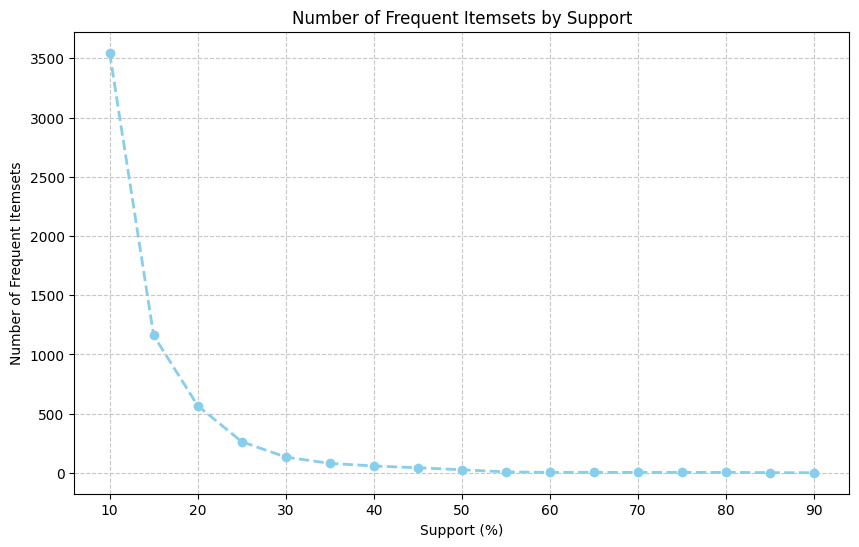

In [104]:
# Calcoliamo il numero di frequent itemsets per ciascun supporto
num_itemsets = [len(frequent_itemsets_by_support[supp]) for supp in support_values]

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))
plt.plot(support_values, num_itemsets, marker="o", color="skyblue", linestyle="--", linewidth=2)
plt.xlabel("Support (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Number of Frequent Itemsets by Support")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### Closed Itemsets

In [105]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((1.099, 2.197]_images, no_adult)",20.069074
1,"(low_rated, no_episodes, 1_country)",20.282575
2,"(low_rated, no_episodes, no_adult)",21.281005
3,"(low_rated, no_episodes)",22.266876
4,"(low_rated, 1_country, no_adult)",20.665620
...,...,...
543,"(1_regions, no_adult)",56.332810
544,"(no_episodes, 1_country, no_adult)",81.594976
545,"(no_episodes, 1_country)",84.000000
546,"(no_episodes, no_adult)",87.987441


In [106]:
# Definiamo i parametri
zmin = 2  # Minimum number of items per itemset
support_values = range(10, 91, 5)  # Supporto da 20 a 90 con passo 10

# Creiamo un dizionario per memorizzare i risultati
closed_itemsets_by_support = {}

# Ciclo per generare i frequent itemsets
for supp in support_values:
    itemsets = fpgrowth(X, target="c", supp=supp, zmin=zmin, report="S")
    # Convertiamo in DataFrame e salviamo nel dizionario
    closed_itemsets_by_support[supp] = pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

# Stampa o esplora i risultati
for supp, dataf in closed_itemsets_by_support.items():
    print(f"Closed Itemsets (Support = {supp}%)")
    display(dataf)
    print("-" * 50)

Closed Itemsets (Support = 10%)


,closed_itemset,support
0,"((1936.4, 1965.6]_year, no_episodes, no_adult)",10.084772
1,"((1936.4, 1965.6]_year, 1_country, no_adult)",10.047096
2,"((1936.4, 1965.6]_year, no_adult)",10.499215
3,"(high_rated, (1994.8, 2024.0]_year, 1_country, no_adult)",10.009419
4,"(high_rated, (1994.8, 2024.0]_year, 1_country)",10.109890
...,...,...
3248,"(1_regions, no_adult)",56.332810
3249,"(no_episodes, 1_country, no_adult)",81.594976
3250,"(no_episodes, 1_country)",84.000000
3251,"(no_episodes, no_adult)",87.987441


--------------------------------------------------
Closed Itemsets (Support = 15%)


,closed_itemset,support
0,"(short, genre_Comedy/Family, no_adult, no_episodes)",15.177394
1,"(short, genre_Comedy/Family, no_episodes)",15.196232
2,"(short, no_adult, no_episodes)",15.491366
3,"(short, no_episodes)",15.510204
4,"((-inf, 0.0]_images, 1_regions)",15.290424
...,...,...
1093,"(1_regions, no_adult)",56.332810
1094,"(no_episodes, 1_country, no_adult)",81.594976
1095,"(no_episodes, 1_country)",84.000000
1096,"(no_episodes, no_adult)",87.987441


--------------------------------------------------
Closed Itemsets (Support = 20%)


,closed_itemset,support
0,"((1.099, 2.197]_images, no_adult)",20.069074
1,"(low_rated, no_episodes, 1_country)",20.282575
2,"(low_rated, no_episodes, no_adult)",21.281005
3,"(low_rated, no_episodes)",22.266876
4,"(low_rated, 1_country, no_adult)",20.665620
...,...,...
543,"(1_regions, no_adult)",56.332810
544,"(no_episodes, 1_country, no_adult)",81.594976
545,"(no_episodes, 1_country)",84.000000
546,"(no_episodes, no_adult)",87.987441


--------------------------------------------------
Closed Itemsets (Support = 25%)


,closed_itemset,support
0,"((-0.001, 29.0]_minutes, no_adult)",25.481947
1,"((1.7910000000000001, 2.773]_votes, 1_country)",25.092622
2,"((0.999, 17.0]_credits, 1_country)",25.456829
3,"((29.0, 53.0]_minutes, 1_country, no_adult)",25.262166
4,"((29.0, 53.0]_minutes, 1_country)",25.375196
...,...,...
252,"(1_regions, no_adult)",56.332810
253,"(no_episodes, 1_country, no_adult)",81.594976
254,"(no_episodes, 1_country)",84.000000
255,"(no_episodes, no_adult)",87.987441


--------------------------------------------------
Closed Itemsets (Support = 30%)


,closed_itemset,support
0,"(movie, 1_country, no_adult, no_episodes)",33.412873
1,"(movie, 1_country, no_episodes)",34.103611
2,"(movie, no_adult, no_episodes)",37.839874
3,"(movie, no_episodes)",38.555730
4,"(tvseries_related, 1_regions, no_adult)",30.153846
...,...,...
125,"(1_regions, no_adult)",56.332810
126,"(no_episodes, 1_country, no_adult)",81.594976
127,"(no_episodes, 1_country)",84.000000
128,"(no_episodes, no_adult)",87.987441


--------------------------------------------------
Closed Itemsets (Support = 35%)


,closed_itemset,support
0,"(movie, no_adult, no_episodes)",37.839874
1,"(movie, no_episodes)",38.555730
2,"(tvseries_related, 1_country, no_adult)",36.904239
3,"(tvseries_related, 1_country)",37.010989
4,"(tvseries_related, no_adult)",38.718995
...,...,...
74,"(1_regions, no_adult)",56.332810
75,"(no_episodes, 1_country, no_adult)",81.594976
76,"(no_episodes, 1_country)",84.000000
77,"(no_episodes, no_adult)",87.987441


--------------------------------------------------
Closed Itemsets (Support = 40%)


,closed_itemset,support
0,"((0.0, 1.099]_images, no_adult)",40.740973
1,"(genre_Drama/Crime, no_adult)",41.783359
2,"(US, no_episodes)",41.180534
3,"(US, 1_country)",41.186813
4,"(US, no_adult)",42.122449
5,"(Reviews, no_episodes, 1_country, no_adult)",40.018838
6,"(Reviews, no_episodes, 1_country)",40.935636
7,"(Reviews, no_episodes, no_adult)",41.946625
8,"(Reviews, no_episodes)",42.913658
9,"(Reviews, 1_country, no_adult)",44.860283


--------------------------------------------------
Closed Itemsets (Support = 45%)


,closed_itemset,support
0,"(Reviews, 1_country)",45.839874
1,"(Reviews, no_adult)",46.938776
2,"(No_reviews, no_episodes, no_adult)",46.040816
3,"(No_reviews, no_episodes)",47.572998
4,"(No_reviews, 1_country, no_adult)",45.525903
5,"(No_reviews, 1_country)",47.051805
6,"(No_reviews, no_adult)",50.461538
7,"(genre_Comedy/Family, no_episodes, 1_country, no_adult)",46.744113
8,"(genre_Comedy/Family, no_episodes, 1_country)",47.271586
9,"(genre_Comedy/Family, no_episodes, no_adult)",49.494505


--------------------------------------------------
Closed Itemsets (Support = 50%)


,closed_itemset,support
0,"(No_reviews, no_adult)",50.461538
1,"(genre_Comedy/Family, no_episodes)",50.047096
2,"(genre_Comedy/Family, 1_country, no_adult)",50.693878
3,"(genre_Comedy/Family, 1_country)",51.259027
4,"(genre_Comedy/Family, no_adult)",53.695447
5,"((1994.8, 2024.0]_year, 1_country)",51.026688
6,"((1994.8, 2024.0]_year, no_adult)",53.965463
7,"(Not US, 1_country, no_adult)",51.045526
8,"(Not US, 1_country)",51.704867
9,"(Not US, no_adult)",55.277865


--------------------------------------------------
Closed Itemsets (Support = 55%)


,closed_itemset,support
0,"(Not US, no_adult)",55.277865
1,"(good_rated, no_adult)",56.219780
2,"(1_regions, 1_country)",55.868132
3,"(1_regions, no_adult)",56.332810
4,"(no_episodes, 1_country, no_adult)",81.594976
5,"(no_episodes, 1_country)",84.000000
6,"(no_episodes, no_adult)",87.987441
7,"(1_country, no_adult)",90.386185


--------------------------------------------------
Closed Itemsets (Support = 60%)


,closed_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976
1,"(no_episodes, 1_country)",84.000000
2,"(no_episodes, no_adult)",87.987441
3,"(1_country, no_adult)",90.386185


--------------------------------------------------
Closed Itemsets (Support = 65%)


,closed_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976
1,"(no_episodes, 1_country)",84.000000
2,"(no_episodes, no_adult)",87.987441
3,"(1_country, no_adult)",90.386185


--------------------------------------------------
Closed Itemsets (Support = 70%)


,closed_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976
1,"(no_episodes, 1_country)",84.000000
2,"(no_episodes, no_adult)",87.987441
3,"(1_country, no_adult)",90.386185


--------------------------------------------------
Closed Itemsets (Support = 75%)


,closed_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976
1,"(no_episodes, 1_country)",84.000000
2,"(no_episodes, no_adult)",87.987441
3,"(1_country, no_adult)",90.386185


--------------------------------------------------
Closed Itemsets (Support = 80%)


,closed_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976
1,"(no_episodes, 1_country)",84.000000
2,"(no_episodes, no_adult)",87.987441
3,"(1_country, no_adult)",90.386185


--------------------------------------------------
Closed Itemsets (Support = 85%)


,closed_itemset,support
0,"(no_episodes, no_adult)",87.987441
1,"(1_country, no_adult)",90.386185


--------------------------------------------------
Closed Itemsets (Support = 90%)


,closed_itemset,support
0,"(1_country, no_adult)",90.386185


--------------------------------------------------


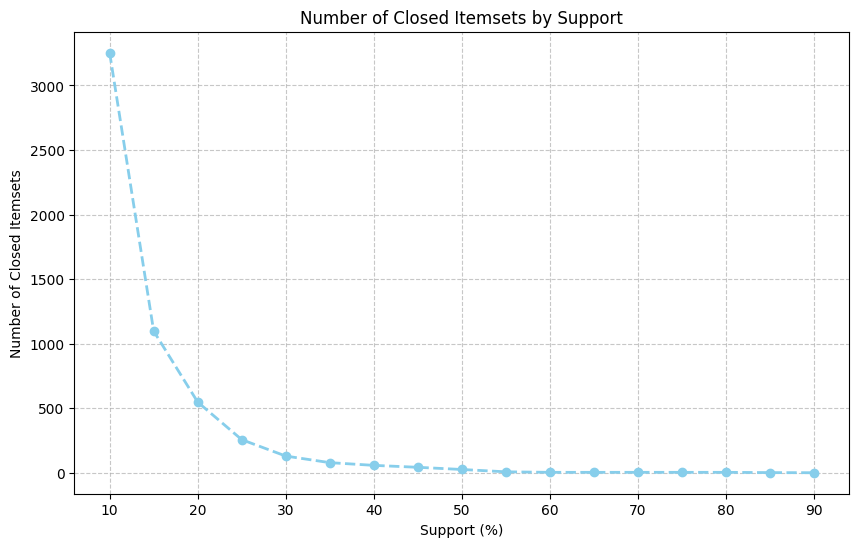

In [107]:
# Calcoliamo il numero di frequent itemsets per ciascun supporto
num_itemsets = [len(closed_itemsets_by_support[supp]) for supp in support_values]

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))
plt.plot(support_values, num_itemsets, marker="o", color="skyblue", linestyle="--", linewidth=2)
plt.xlabel("Support (%)")
plt.ylabel("Number of Closed Itemsets")
plt.title("Number of Closed Itemsets by Support")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### Maximal Itemsets

In [108]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"((1.099, 2.197]_images, no_adult)",20.069074
1,"(low_rated, no_episodes, 1_country)",20.282575
2,"(low_rated, no_episodes, no_adult)",21.281005
3,"(low_rated, 1_country, no_adult)",20.665620
4,"((90.0, 570.0]_minutes, movie, no_adult, no_episodes)",20.929356
...,...,...
87,"((1994.8, 2024.0]_year, good_rated, no_episodes, 1_country, no_adult)",24.533752
88,"((1994.8, 2024.0]_year, 1_regions, no_episodes, 1_country, no_adult)",29.532182
89,"(Not US, good_rated, no_episodes, 1_country, no_adult)",25.638932
90,"(Not US, 1_regions, no_episodes, 1_country, no_adult)",24.414443


In [109]:
# Definiamo i parametri
zmin = 2  # Minimum number of items per itemset
support_values = range(10, 91, 5)  # Supporto da 20 a 90 con passo 10

# Creiamo un dizionario per memorizzare i risultati
maximal_itemsets_by_support = {}

# Ciclo per generare i frequent itemsets
for supp in support_values:
    itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin, report="S")
    # Convertiamo in DataFrame e salviamo nel dizionario
    maximal_itemsets_by_support[supp] = pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

# Stampa o esplora i risultati
for supp, dataf in maximal_itemsets_by_support.items():
    print(f"Maximal Itemsets (Support = {supp}%)")
    display(dataf)
    print("-" * 50)

Maximal Itemsets (Support = 10%)


,maximal_itemset,support
0,"((1936.4, 1965.6]_year, no_episodes, no_adult)",10.084772
1,"((1936.4, 1965.6]_year, 1_country, no_adult)",10.047096
2,"(high_rated, (1994.8, 2024.0]_year, 1_country, no_adult)",10.009419
3,"(high_rated, 1_regions, no_episodes, 1_country, no_adult)",10.235479
4,"(short, (-0.001, 29.0]_minutes, genre_Comedy/Family, 1_regions, no_adult, no_episodes)",10.241758
...,...,...
443,"(genre_Comedy/Family, (1994.8, 2024.0]_year, good_rated, 1_regions, no_episodes, 1_country, no_adult)",10.291994
444,"(genre_Comedy/Family, Not US, good_rated, no_episodes, 1_country, no_adult)",13.751962
445,"((1994.8, 2024.0]_year, Not US, good_rated, 1_regions, no_adult)",10.109890
446,"((1994.8, 2024.0]_year, Not US, good_rated, no_episodes, 1_country, no_adult)",14.160126


--------------------------------------------------
Maximal Itemsets (Support = 15%)


,maximal_itemset,support
0,"(short, genre_Comedy/Family, no_adult, no_episodes)",15.177394
1,"((-inf, 0.0]_images, 1_regions)",15.290424
2,"((-inf, 0.0]_images, no_episodes, 1_country, no_adult)",15.629513
3,"((2.197, 8.162]_images, No_reviews, no_adult)",15.598116
4,"((2.197, 8.162]_images, no_episodes, no_adult)",16.697017
...,...,...
179,"((1994.8, 2024.0]_year, Not US, 1_regions, 1_country, no_adult)",16.897959
180,"((1994.8, 2024.0]_year, Not US, no_episodes, 1_country, no_adult)",24.502355
181,"((1994.8, 2024.0]_year, good_rated, 1_regions, no_episodes, 1_country, no_adult)",17.262166
182,"(Not US, good_rated, 1_regions, 1_country, no_adult)",15.629513


--------------------------------------------------
Maximal Itemsets (Support = 20%)


,maximal_itemset,support
0,"((1.099, 2.197]_images, no_adult)",20.069074
1,"(low_rated, no_episodes, 1_country)",20.282575
2,"(low_rated, no_episodes, no_adult)",21.281005
3,"(low_rated, 1_country, no_adult)",20.665620
4,"((90.0, 570.0]_minutes, movie, no_adult, no_episodes)",20.929356
...,...,...
87,"((1994.8, 2024.0]_year, good_rated, no_episodes, 1_country, no_adult)",24.533752
88,"((1994.8, 2024.0]_year, 1_regions, no_episodes, 1_country, no_adult)",29.532182
89,"(Not US, good_rated, no_episodes, 1_country, no_adult)",25.638932
90,"(Not US, 1_regions, no_episodes, 1_country, no_adult)",24.414443


--------------------------------------------------
Maximal Itemsets (Support = 25%)


,maximal_itemset,support
0,"((-0.001, 29.0]_minutes, no_adult)",25.481947
1,"((1.7910000000000001, 2.773]_votes, 1_country)",25.092622
2,"((0.999, 17.0]_credits, 1_country)",25.456829
3,"((29.0, 53.0]_minutes, 1_country, no_adult)",25.262166
4,"(genre_Action/Adventure, no_episodes, no_adult)",25.952904
5,"(genre_Action/Adventure, 1_country)",25.262166
6,"((1965.6, 1994.8]_year, no_episodes, 1_country)",25.375196
7,"((1965.6, 1994.8]_year, no_episodes, no_adult)",26.178964
8,"((1965.6, 1994.8]_year, 1_country, no_adult)",26.197802
9,"(movie, (1.933, 24.333]_regions, no_episodes)",25.205651


--------------------------------------------------
Maximal Itemsets (Support = 30%)


,maximal_itemset,support
0,"(movie, 1_country, no_adult, no_episodes)",33.412873
1,"(tvseries_related, 1_regions, no_adult)",30.153846
2,"(tvseries_related, 1_country, no_adult)",36.904239
3,"((1.933, 24.333]_regions, no_episodes, 1_country, no_adult)",30.342229
4,"((0.0, 1.099]_images, no_episodes, 1_country, no_adult)",34.963893
5,"(genre_Drama/Crime, no_episodes, 1_country, no_adult)",34.781790
6,"(US, no_episodes, 1_country, no_adult)",36.810047
7,"(Reviews, Not US, no_adult)",30.411303
8,"(Reviews, 1_regions, no_episodes, 1_country)",30.028257
9,"(Reviews, 1_regions, no_episodes, no_adult)",30.530612


--------------------------------------------------
Maximal Itemsets (Support = 35%)


,maximal_itemset,support
0,"(movie, no_adult, no_episodes)",37.839874
1,"(tvseries_related, 1_country, no_adult)",36.904239
2,"((1.933, 24.333]_regions, 1_country)",35.723705
3,"((1.933, 24.333]_regions, no_adult)",39.108320
4,"((0.0, 1.099]_images, no_episodes, 1_country)",35.026688
5,"((0.0, 1.099]_images, no_episodes, no_adult)",37.186813
6,"((0.0, 1.099]_images, 1_country, no_adult)",38.398744
7,"(genre_Drama/Crime, no_episodes, 1_country)",35.026688
8,"(genre_Drama/Crime, no_episodes, no_adult)",38.392465
9,"(genre_Drama/Crime, 1_country, no_adult)",37.883830


--------------------------------------------------
Maximal Itemsets (Support = 40%)


,maximal_itemset,support
0,"((0.0, 1.099]_images, no_adult)",40.740973
1,"(genre_Drama/Crime, no_adult)",41.783359
2,"(US, no_episodes)",41.180534
3,"(US, 1_country)",41.186813
4,"(US, no_adult)",42.122449
5,"(Reviews, no_episodes, 1_country, no_adult)",40.018838
6,"(No_reviews, no_episodes, 1_country, no_adult)",41.576138
7,"(genre_Comedy/Family, no_episodes, 1_country, no_adult)",46.744113
8,"((1994.8, 2024.0]_year, no_episodes, 1_country, no_adult)",43.572998
9,"(Not US, no_episodes, 1_country, no_adult)",44.784929


--------------------------------------------------
Maximal Itemsets (Support = 45%)


,maximal_itemset,support
0,"(Reviews, 1_country)",45.839874
1,"(Reviews, no_adult)",46.938776
2,"(No_reviews, no_episodes, no_adult)",46.040816
3,"(No_reviews, 1_country, no_adult)",45.525903
4,"(genre_Comedy/Family, no_episodes, 1_country, no_adult)",46.744113
5,"((1994.8, 2024.0]_year, no_episodes, no_adult)",47.346939
6,"((1994.8, 2024.0]_year, 1_country, no_adult)",49.833595
7,"(Not US, no_episodes, 1_country)",45.394035
8,"(Not US, no_episodes, no_adult)",48.653061
9,"(Not US, 1_country, no_adult)",51.045526


--------------------------------------------------
Maximal Itemsets (Support = 50%)


,maximal_itemset,support
0,"(No_reviews, no_adult)",50.461538
1,"(genre_Comedy/Family, no_episodes)",50.047096
2,"(genre_Comedy/Family, 1_country, no_adult)",50.693878
3,"((1994.8, 2024.0]_year, 1_country)",51.026688
4,"((1994.8, 2024.0]_year, no_adult)",53.965463
5,"(Not US, 1_country, no_adult)",51.045526
6,"(good_rated, no_episodes, no_adult)",50.499215
7,"(good_rated, 1_country, no_adult)",52.144427
8,"(1_regions, no_episodes, 1_country, no_adult)",50.141287


--------------------------------------------------
Maximal Itemsets (Support = 55%)


,maximal_itemset,support
0,"(Not US, no_adult)",55.277865
1,"(good_rated, no_adult)",56.219780
2,"(1_regions, 1_country)",55.868132
3,"(1_regions, no_adult)",56.332810
4,"(no_episodes, 1_country, no_adult)",81.594976


--------------------------------------------------
Maximal Itemsets (Support = 60%)


,maximal_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976


--------------------------------------------------
Maximal Itemsets (Support = 65%)


,maximal_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976


--------------------------------------------------
Maximal Itemsets (Support = 70%)


,maximal_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976


--------------------------------------------------
Maximal Itemsets (Support = 75%)


,maximal_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976


--------------------------------------------------
Maximal Itemsets (Support = 80%)


,maximal_itemset,support
0,"(no_episodes, 1_country, no_adult)",81.594976


--------------------------------------------------
Maximal Itemsets (Support = 85%)


,maximal_itemset,support
0,"(no_episodes, no_adult)",87.987441
1,"(1_country, no_adult)",90.386185


--------------------------------------------------
Maximal Itemsets (Support = 90%)


,maximal_itemset,support
0,"(1_country, no_adult)",90.386185


--------------------------------------------------


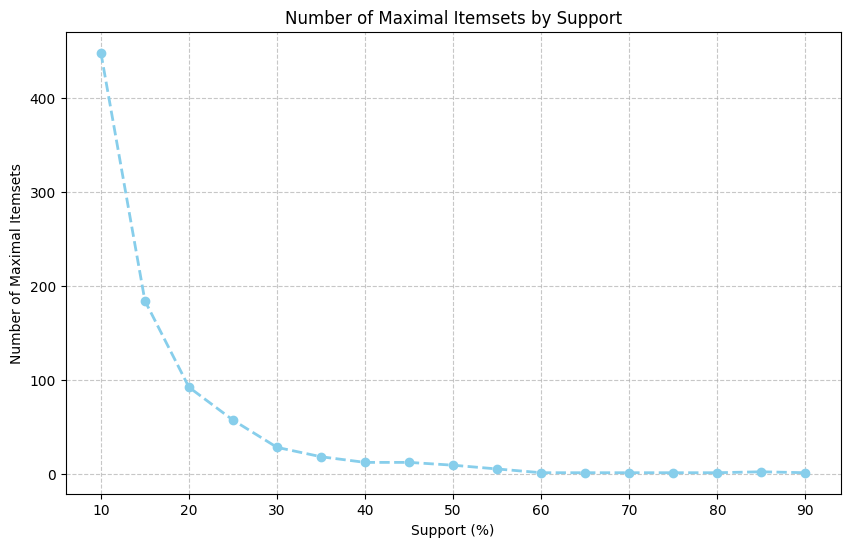

In [110]:
# Calcoliamo il numero di frequent itemsets per ciascun supporto
num_itemsets = [len(maximal_itemsets_by_support[supp]) for supp in support_values]

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))
plt.plot(support_values, num_itemsets, marker="o", color="skyblue", linestyle="--", linewidth=2)
plt.xlabel("Support (%)")
plt.ylabel("Number of Maximal Itemsets")
plt.title("Number of Maximal Itemsets by Support")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [111]:
# Definiamo i parametri
# zmin_values = range(2, df.shape[1] + 1) # Minimum number of items per itemset
zmin_values = np.arange(2, df.shape[1] + 1) # Minimum number of items per itemset
supp = 20  # Supporto da 20 a 90 con passo 10

# Creiamo un dizionario per memorizzare i risultati
maximal_itemsets_by_zmin = {}

# Ciclo per generare i frequent itemsets
for zmin in zmin_values:
    itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin, report="S")
    # Convertiamo in DataFrame e salviamo nel dizionario
    maximal_itemsets_by_zmin[zmin] = pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

# Stampa o esplora i risultati
for zmin, dataf in maximal_itemsets_by_zmin.items():
    print(f"Maximal Itemsets (Z_min = {zmin})")
    display(dataf)
    print("-" * 50)

Maximal Itemsets (Z_min = 2)


,maximal_itemset,support
0,"((1.099, 2.197]_images, no_adult)",20.069074
1,"(low_rated, no_episodes, 1_country)",20.282575
2,"(low_rated, no_episodes, no_adult)",21.281005
3,"(low_rated, 1_country, no_adult)",20.665620
4,"((90.0, 570.0]_minutes, movie, no_adult, no_episodes)",20.929356
...,...,...
87,"((1994.8, 2024.0]_year, good_rated, no_episodes, 1_country, no_adult)",24.533752
88,"((1994.8, 2024.0]_year, 1_regions, no_episodes, 1_country, no_adult)",29.532182
89,"(Not US, good_rated, no_episodes, 1_country, no_adult)",25.638932
90,"(Not US, 1_regions, no_episodes, 1_country, no_adult)",24.414443


--------------------------------------------------
Maximal Itemsets (Z_min = 3)


,maximal_itemset,support
0,"(low_rated, no_episodes, 1_country)",20.282575
1,"(low_rated, no_episodes, no_adult)",21.281005
2,"(low_rated, 1_country, no_adult)",20.665620
3,"((90.0, 570.0]_minutes, movie, no_adult, no_episodes)",20.929356
4,"((90.0, 570.0]_minutes, 1_country, no_adult)",20.113030
...,...,...
86,"((1994.8, 2024.0]_year, good_rated, no_episodes, 1_country, no_adult)",24.533752
87,"((1994.8, 2024.0]_year, 1_regions, no_episodes, 1_country, no_adult)",29.532182
88,"(Not US, good_rated, no_episodes, 1_country, no_adult)",25.638932
89,"(Not US, 1_regions, no_episodes, 1_country, no_adult)",24.414443


--------------------------------------------------
Maximal Itemsets (Z_min = 4)


,maximal_itemset,support
0,"((90.0, 570.0]_minutes, movie, no_adult, no_episodes)",20.929356
1,"((17.0, 35.0]_credits, no_episodes, 1_country, no_adult)",20.345369
2,"((3.664, 5.056]_votes, no_episodes, 1_country, no_adult)",20.332810
3,"((35.0, 66.0]_credits, no_episodes, 1_country, no_adult)",21.092622
4,"((5.056, 13.624]_votes, No_reviews, no_episodes, no_adult)",20.948195
...,...,...
65,"((1994.8, 2024.0]_year, good_rated, no_episodes, 1_country, no_adult)",24.533752
66,"((1994.8, 2024.0]_year, 1_regions, no_episodes, 1_country, no_adult)",29.532182
67,"(Not US, good_rated, no_episodes, 1_country, no_adult)",25.638932
68,"(Not US, 1_regions, no_episodes, 1_country, no_adult)",24.414443


--------------------------------------------------
Maximal Itemsets (Z_min = 5)


,maximal_itemset,support
0,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, 1_country, no_adult)",21.249608
1,"(movie, (1.933, 24.333]_regions, 1_country, no_adult, no_episodes)",21.519623
2,"(movie, No_reviews, 1_country, no_adult, no_episodes)",20.590267
3,"(movie, Not US, 1_country, no_adult, no_episodes)",22.832025
4,"(tvseries_related, 1_regions, no_episodes, 1_country, no_adult)",24.923077
5,"((1.933, 24.333]_regions, Not US, no_episodes, 1_country, no_adult)",20.087912
6,"((0.0, 1.099]_images, Not US, no_episodes, 1_country, no_adult)",20.188383
7,"((0.0, 1.099]_images, good_rated, no_episodes, 1_country, no_adult)",20.571429
8,"((0.0, 1.099]_images, 1_regions, no_episodes, 1_country, no_adult)",23.698587
9,"(genre_Drama/Crime, No_reviews, no_episodes, 1_country, no_adult)",20.087912


--------------------------------------------------
Maximal Itemsets (Z_min = 6)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 7)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 8)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 9)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 10)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 11)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 12)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 13)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 14)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 15)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 16)


,maximal_itemset,support


--------------------------------------------------
Maximal Itemsets (Z_min = 17)


,maximal_itemset,support


--------------------------------------------------


### Support plots

Support vs number of itemsets

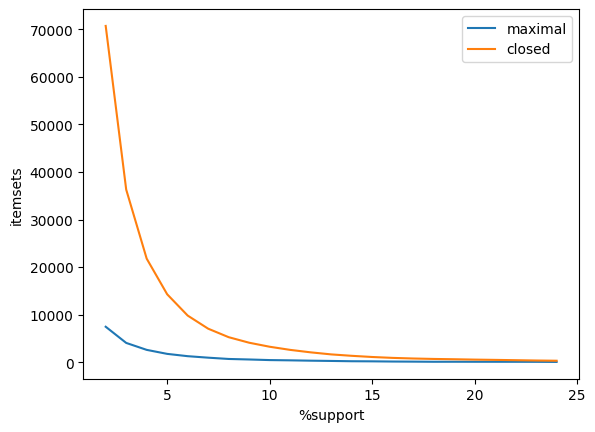

In [112]:
len_max_it = []
len_cl_it = []
max_supp = 25
zmin=2
for i in range(2, max_supp):
    max_itemsets = fpgrowth(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = fpgrowth(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

Support vs number of itemsets for genres

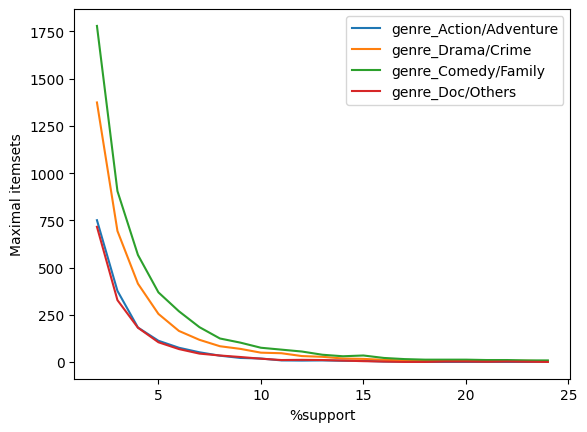

In [113]:
filter_1 = []
filter_2 = []
filter_3 = []
filter_4 = []
# filter_5 = []
for i in range(2, max_supp):
    max_itemsets = fpgrowth(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "genre_Action/Adventure" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "genre_Drama/Crime" in item[0]]))
    filter_3.append(len([item for item in max_itemsets if "genre_Comedy/Family" in item[0]]))
    filter_4.append(len([item for item in max_itemsets if "genre_Doc/Others" in item[0]]))
    # filter_5.append(len([item for item in max_itemsets if "Sci-Fi and Fantasy" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="genre_Action/Adventure")
plt.plot(np.arange(2, max_supp), filter_2, label="genre_Drama/Crime")
plt.plot(np.arange(2, max_supp), filter_3, label="genre_Comedy/Family")
plt.plot(np.arange(2, max_supp), filter_4, label="genre_Doc/Others")
# plt.plot(np.arange(2, max_supp), filter_5, label="Sci-Fi and Fantasy")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("Maximal itemsets")

plt.show()

# 'Comedy', 'Action and Adventure', 'Other', 'Drama', 'Sci-Fi and Fantasy'

Support vs number of itemsets for grouped_titleType

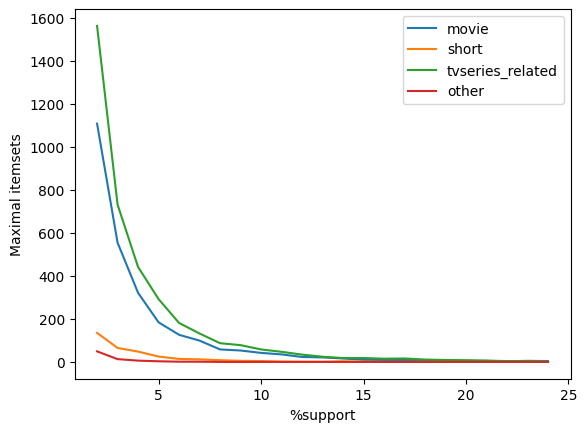

In [114]:
filter_1 = []
filter_2 = []
filter_3 = []
filter_4 = []
# filter_5 = []
for i in range(2, max_supp):
    max_itemsets = fpgrowth(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "movie" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "short" in item[0]]))
    filter_3.append(len([item for item in max_itemsets if "tvseries_related" in item[0]]))
    filter_4.append(len([item for item in max_itemsets if "other" in item[0]]))
    # filter_5.append(len([item for item in max_itemsets if "Sci-Fi and Fantasy" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="movie")
plt.plot(np.arange(2, max_supp), filter_2, label="short")
plt.plot(np.arange(2, max_supp), filter_3, label="tvseries_related")
plt.plot(np.arange(2, max_supp), filter_4, label="other")
# plt.plot(np.arange(2, max_supp), filter_5, label="Sci-Fi and Fantasy")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("Maximal itemsets")

plt.show()

# grouped_titleType
# movie               
# other               
# short               
# tvseries_related    


In [115]:
len_max_it = []
len_cl_it = []
len_fr_it = []

# Numero totale di transazioni
total_transactions = len(X)

# Step 1: Definizione della griglia di parametri
supp_values = np.linspace(10, 50, 5)  # Supporto minimo da 10% a 50%
zmin_values = np.arange(5, df.shape[1] + 1)  # zmin da 2 fino al numero di colonne

# Set per eliminare duplicati
top_closed = set()
top_maximal = set()
top_frequent = set()
        
for supp in supp_values:
    for zmin in zmin_values:
        fr_itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin)
        max_itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin)
        cl_itemsets = fpgrowth(X, target="c", supp=supp, zmin=zmin)
        len_max_it.append(len(max_itemsets))
        len_cl_it.append(len(cl_itemsets))
        len_fr_it.append(len(fr_itemsets))

        # Aggiungi gli itemset ai set
        top_closed.update(cl_itemsets)
        top_maximal.update(max_itemsets)
        top_frequent.update(fr_itemsets)

        # Stampa i pattern in ordine decrescente per supporto (massimali)
        print(f"\nMassimal itemsets (supporto={supp:.2f}, zmin={zmin}):")
        for itemset, support in sorted(
            max_itemsets,
            key=lambda x: -x[1]  # Ordina per supporto decrescente
        ):
            percent_support = (support / total_transactions) * 100
            print(f"Itemset: {itemset}, Supporto: {percent_support:.2f}%")

        # Stampa i pattern in ordine decrescente per supporto (chiusi)
        print(f"\nClosed itemsets (supporto={supp:.2f}, zmin={zmin}):")
        for itemset, support in sorted(
            cl_itemsets,
            key=lambda x: -x[1]  # Ordina per supporto decrescente
        ):
            percent_support = (support / total_transactions) * 100
            print(f"Itemset: {itemset}, Supporto: {percent_support:.2f}%")

        # Stampa i pattern in ordine decrescente per supporto (frequenti)
        print(f"\nFrequent itemsets (supporto={supp:.2f}, zmin={zmin}):")
        for itemset, support in sorted(
            fr_itemsets,
            key=lambda x: -x[1]  # Ordina per supporto decrescente
        ):
            percent_support = (support / total_transactions) * 100
            print(f"Itemset: {itemset}, Supporto: {percent_support:.2f}%")


# Filtra i top 3 itemset con il supporto maggiore
top_closed = sorted(top_closed, key=lambda x: -x[1])[:3]
top_maximal = sorted(top_maximal, key=lambda x: -x[1])[:3]
top_frequent = sorted(top_frequent, key=lambda x: -x[1])[:3]

# Stampa i risultati finali
print("\nTop 3 Closed Itemsets by Support:")
for itemset, support in top_closed:
    percent_support = (support / total_transactions) * 100
    print(f"Itemset: {itemset}, Supporto: {percent_support:.2f}%")

print("\nTop 3 Maximal Itemsets by Support:")
for itemset, support in top_maximal:
    percent_support = (support / total_transactions) * 100
    print(f"Itemset: {itemset}, Supporto: {percent_support:.2f}%")

print("\nTop 3 Frequent Itemsets by Support:")
for itemset, support in top_frequent:
    percent_support = (support / total_transactions) * 100
    print(f"Itemset: {itemset}, Supporto: {percent_support:.2f}%")





# plt.plot(np.arange(2, 50), len_max_it, label="maximal")
# plt.plot(np.arange(2, 50), len_cl_it, label="closed")
# plt.legend()
# plt.xlabel("%support")
# plt.ylabel("itemsets")

# plt.show()


Massimal itemsets (supporto=10.00, zmin=5):
Itemset: ('(0.0, 1.099]_images', 'No_reviews', 'no_episodes', '1_country', 'no_adult'), Supporto: 15.64%
Itemset: ('movie', '(1.933, 24.333]_regions', 'No_reviews', '1_country', 'no_adult', 'no_episodes'), Supporto: 15.58%
Itemset: ('movie', '(1994.8, 2024.0]_year', '1_country', 'no_adult', 'no_episodes'), Supporto: 15.03%
Itemset: ('(1.933, 24.333]_regions', 'genre_Comedy/Family', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.97%
Itemset: ('(0.0, 1.099]_images', 'genre_Comedy/Family', '1_regions', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.74%
Itemset: ('(1965.6, 1994.8]_year', '1_regions', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.68%
Itemset: ('(29.0, 53.0]_minutes', 'tvseries_related', '1_regions', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.66%
Itemset: ('(1965.6, 1994.8]_year', 'good_rated', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.66%
Itemset: ('US', '(1994.8, 2024.0]_year', '1_reg

### Rules
if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [116]:
conf = 60
supp = 20
zmin = 4

rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)


rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False) #stampato in questo modo l'elenco è troncato e non scrollabile

pd.set_option('display.max_colwidth', None)

# Convertiamo il DataFrame in HTML e lo rendiamo scrollabile
display(HTML(rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))


rules_df.shape


,consequent,antecedent,abs_support,%_support,confidence,lift
1162,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, 1_country, no_adult)",2214,13.902669,0.654255,4.218225
1163,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, 1_country)",2216,13.915228,0.654073,4.217051
1161,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, no_adult)",2285,14.348509,0.651926,4.203206
1164,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes)",2287,14.361068,0.651753,4.202089
1159,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, 1_country, no_adult)",2214,13.902669,0.635476,4.097151
1160,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, 1_country)",2216,13.915228,0.635321,4.096149
1158,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_adult)",2285,14.348509,0.630519,4.065187
1156,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country, no_adult)",2252,14.141287,0.601817,3.880137
1157,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country)",2254,14.153846,0.601548,3.878401
1142,"(90.0, 570.0]_minutes","(movie, genre_Drama/Crime, no_adult)",2052,12.885400,0.625229,2.629196


(1165, 6)

In [117]:
specific_title_type = 'other'  # Sostituisci con il valore che vuoi cercare

# Filtra il DataFrame per il valore specifico della colonna 'grouped_titleType'
filtered_rules = rules_df[rules_df['consequent'].apply(lambda x: specific_title_type in x)]

# Ordina i risultati per il valore di 'lift' in modo decrescente
filtered_rules_sorted = filtered_rules.sort_values(by="lift", axis=0, ascending=False)

# Estrai la regola con il lift più alto
top_rule = filtered_rules_sorted.iloc[0] if not filtered_rules_sorted.empty else None

if top_rule is not None:
    print("La regola con il lift più alto per '{}' è:".format(specific_title_type))
    print(f"Antecedente: {top_rule['antecedent']}")
    print(f"Conseguente: {top_rule['consequent']}")
    print(f"Lift: {top_rule['lift']}")
    print(f"Confidence: {top_rule['confidence']}%")
    print(f"Supporto assoluto: {top_rule['abs_support']}")
    print(f"Supporto percentuale: {top_rule['%_support']}%")
else:
    print(f"Nessuna regola trovata per il valore '{specific_title_type}'.")


Nessuna regola trovata per il valore 'other'.


PROVA CLASSIFICATION PER I TITLETYPES

In [118]:
# Estrai tutti i valori distinti dalla colonna 'titleType'
unique_title_types = df['grouped_titleType'].dropna().unique()

# Filtra le regole che hanno 'titleType' come conseguente
title_type_rules_df = rules_df[rules_df["consequent"].isin(unique_title_types)]

# Convertiamo il DataFrame in HTML e lo rendiamo scrollabile
display(HTML(title_type_rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))


,consequent,antecedent,abs_support,%_support,confidence,lift
1162,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, 1_country, no_adult)",2214,13.902669,0.654255,4.218225
1163,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, 1_country)",2216,13.915228,0.654073,4.217051
1161,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, no_adult)",2285,14.348509,0.651926,4.203206
1164,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes)",2287,14.361068,0.651753,4.202089
1159,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, 1_country, no_adult)",2214,13.902669,0.635476,4.097151
1160,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, 1_country)",2216,13.915228,0.635321,4.096149
1158,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_adult)",2285,14.348509,0.630519,4.065187
1156,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country, no_adult)",2252,14.141287,0.601817,3.880137
1157,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country)",2254,14.153846,0.601548,3.878401
1132,movie,"((90.0, 570.0]_minutes, no_episodes, no_adult)",3333,20.929356,0.956385,2.480525


In [119]:
# Supponiamo che 'rules' sia la lista di regole di associazione

# Itera su tutti i valori distinti
for title_type in unique_title_types:
    # Filtra le regole per il titolo corrente
    matching_rules = [r for r in rules if r[0] == title_type]
    
    # Se ci sono regole per questo titolo
    if matching_rules:
        print('\n')
        print(f"Regole per '{title_type}':")
        
        # Per ogni regola trovata
        for rule in matching_rules:
            consequent = rule[0]  # 'titleType'
            antecedent = rule[1]  # Le condizioni che portano a 'titleType'
            confidence = rule[4]
            print(f"  Conseguente: {consequent}")
            print(f"  Antecedente: {antecedent}")
            print(f"  Confidence: {confidence}")
            print("-" * 50)




Regole per 'tvseries_related':
  Conseguente: tvseries_related
  Antecedente: ('good_rated', '1_regions', 'no_adult')
  Confidence: 0.6099585062240664
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('good_rated', '1_regions', '1_country', 'no_adult')
  Confidence: 0.6106629942947078
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('US', '1_regions', 'no_adult')
  Confidence: 0.6074389424154156
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('US', '1_regions', '1_country', 'no_adult')
  Confidence: 0.6033676333021516
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('(29.0, 53.0]_minutes', '1_country', 'no_adult')
  Confidence: 0.8973402933134477
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('(29.0, 53.0]_minutes', 'no_episodes', 'no_a

PROVA CLASSIFICATION PER GENRES

In [120]:
# Estrai tutti i generi attivi (le colonne binarie dei generi)
genre_columns = [col for col in df.columns if col.startswith('genre_')]

# Filtra le regole che hanno un genere come conseguente
genre_rules_df = rules_df[rules_df["consequent"].isin(genre_columns)]

# Convertiamo il DataFrame in HTML e lo rendiamo scrollabile
display(HTML(genre_rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))



,consequent,antecedent,abs_support,%_support,confidence,lift
1048,genre_Comedy/Family,"((-0.001, 29.0]_minutes, no_episodes, 1_country, no_adult)",3384,21.249608,0.904329,1.665870
1051,genre_Comedy/Family,"((-0.001, 29.0]_minutes, no_episodes, 1_country)",3388,21.274725,0.904190,1.665613
1044,genre_Comedy/Family,"((-0.001, 29.0]_minutes, no_episodes, no_adult)",3505,22.009419,0.901724,1.661070
1041,genre_Comedy/Family,"((-0.001, 29.0]_minutes, 1_country, no_adult)",3484,21.877551,0.895170,1.648997
1143,genre_Drama/Crime,"((90.0, 570.0]_minutes, movie, no_episodes, no_adult)",2052,12.885400,0.615662,1.463563
1141,genre_Drama/Crime,"((90.0, 570.0]_minutes, movie, no_adult)",2052,12.885400,0.615662,1.463563
1145,genre_Drama/Crime,"((90.0, 570.0]_minutes, movie, no_episodes)",2057,12.916797,0.610024,1.450161
1125,genre_Drama/Crime,"((90.0, 570.0]_minutes, no_episodes, no_adult)",2102,13.199372,0.603156,1.433836
977,genre_Comedy/Family,"((0.999, 17.0]_credits, no_episodes, 1_country, no_adult)",2326,14.605965,0.662301,1.220028
976,genre_Comedy/Family,"((0.999, 17.0]_credits, no_episodes, no_adult)",2393,15.026688,0.655437,1.207384


In [121]:
# Supponiamo che 'rules' sia la lista di regole di associazione

# Itera su tutti i valori distinti
for year in genre_columns:
    # Filtra le regole per il titolo corrente
    matching_rules = [r for r in rules if r[0] == year]
    
    # Se ci sono regole per questo titolo
    if matching_rules:
        print('\n')
        print(f"Regole per '{year}':")
        
        # Per ogni regola trovata
        for rule in matching_rules:
            consequent = rule[0]  # 'titleType'
            antecedent = rule[1]  # Le condizioni che portano a 'titleType'
            confidence = rule[4]
            print(f"  Conseguente: {consequent}")
            print(f"  Antecedente: {antecedent}")
            print(f"  Confidence: {confidence}")
            print("-" * 50)



Regole per 'genre_Comedy/Family':
  Conseguente: genre_Comedy/Family
  Antecedente: ('1_regions', '1_country', 'no_adult')
  Confidence: 0.6075817296545328
--------------------------------------------------
  Conseguente: genre_Comedy/Family
  Antecedente: ('1_regions', 'no_episodes', 'no_adult')
  Confidence: 0.6197979312003848
--------------------------------------------------
  Conseguente: genre_Comedy/Family
  Antecedente: ('1_regions', 'no_episodes', '1_country', 'no_adult')
  Confidence: 0.6224170319348779
--------------------------------------------------
  Conseguente: genre_Comedy/Family
  Antecedente: ('1_regions', 'no_episodes', '1_country')
  Confidence: 0.609049005337215
--------------------------------------------------
  Conseguente: genre_Comedy/Family
  Antecedente: ('good_rated', '1_regions', '1_country', 'no_adult')
  Confidence: 0.6002360810544953
--------------------------------------------------
  Conseguente: genre_Comedy/Family
  Antecedente: ('good_rated', '

PROVA CLASSIFICATION PER YEAR

In [122]:
# Estrai tutti i valori distinti dalla colonna 'titleType'
unique_year = df['Year_bin'].dropna().unique()

# Filtra le regole che hanno 'titleType' come conseguente
year_rules_df = rules_df[rules_df["consequent"].isin(unique_year)]

# Visualizza la tabella con le regole filtrate
# Convertiamo il DataFrame in HTML e lo rendiamo scrollabile
display(HTML(year_rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))


,consequent,antecedent,abs_support,%_support,confidence,lift
1074,"(1994.8, 2024.0]_year","((66.0, 1885.0]_credits, no_episodes, no_adult)",2306,14.480377,0.696046,1.260895
1073,"(1994.8, 2024.0]_year","((66.0, 1885.0]_credits, 1_country, no_adult)",2409,15.127159,0.695640,1.260159
790,"(1994.8, 2024.0]_year","(tvseries_related, Reviews, 1_country)",2245,14.097331,0.680716,1.233124
788,"(1994.8, 2024.0]_year","(tvseries_related, Reviews, 1_country, no_adult)",2234,14.028257,0.679647,1.231189
786,"(1994.8, 2024.0]_year","(tvseries_related, Reviews, no_adult)",2304,14.467818,0.675066,1.222890
991,"(1994.8, 2024.0]_year","(genre_Doc/Others, 1_country, no_adult)",2275,14.285714,0.654865,1.186295
295,"(1994.8, 2024.0]_year","(Reviews, 1_regions, no_adult)",3467,21.770801,0.649494,1.176566
300,"(1994.8, 2024.0]_year","(Reviews, 1_regions, 1_country, no_adult)",3337,20.954474,0.648465,1.174702
304,"(1994.8, 2024.0]_year","(Reviews, 1_regions, 1_country)",3389,21.281005,0.644542,1.167595
992,"(1994.8, 2024.0]_year","(genre_Doc/Others, no_episodes, no_adult)",2071,13.004710,0.643168,1.165106


In [123]:
# Supponiamo che 'rules' sia la lista di regole di associazione

# Itera su tutti i valori distinti
for year in unique_year:
    # Filtra le regole per il titolo corrente
    matching_rules = [r for r in rules if r[0] == year]
    
    # Se ci sono regole per questo titolo
    if matching_rules:
        print('\n')
        print(f"Regole per '{year}':")
        
        # Per ogni regola trovata
        for rule in matching_rules:
            consequent = rule[0]  # 'titleType'
            antecedent = rule[1]  # Le condizioni che portano a 'titleType'
            confidence = rule[4]
            print(f"  Conseguente: {consequent}")
            print(f"  Antecedente: {antecedent}")
            print(f"  Confidence: {confidence}")
            print("-" * 50)




Regole per '(1994.8, 2024.0]_year':
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('Not US', '1_regions', 'no_adult')
  Confidence: 0.6188997338065662
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('Not US', '1_regions', '1_country', 'no_adult')
  Confidence: 0.6186206896551724
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('Not US', '1_regions', '1_country')
  Confidence: 0.6196639418710264
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('Not US', '1_regions', 'no_episodes', 'no_adult')
  Confidence: 0.6112899232483288
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('Not US', '1_regions', 'no_episodes', '1_country', 'no_adult')
  Confidence: 0.6111111111111112
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antece

GRAFICI RULES

In [127]:
len_r = []
min_sup = 1
max_sup = 26
min_conf = 50
max_conf = 91
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = fpgrowth(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

# len_r sarà una matrice 2D in cui:
# ogni riga rappresenta un valore di supporto.
# ogni colonna rappresenta un valore di confidenza.
# ogni elemento nella matrice rappresenta il numero di regole generate per una combinazione di supporto e confidenza.

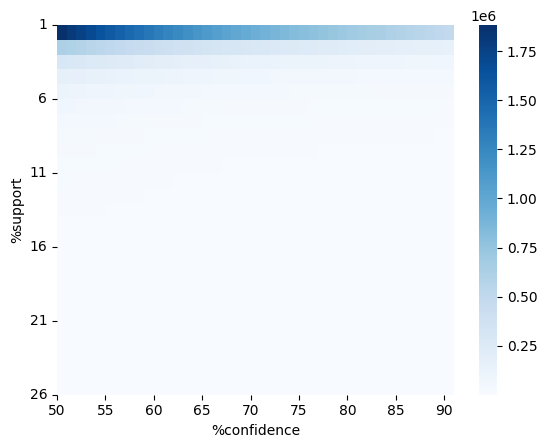

In [128]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

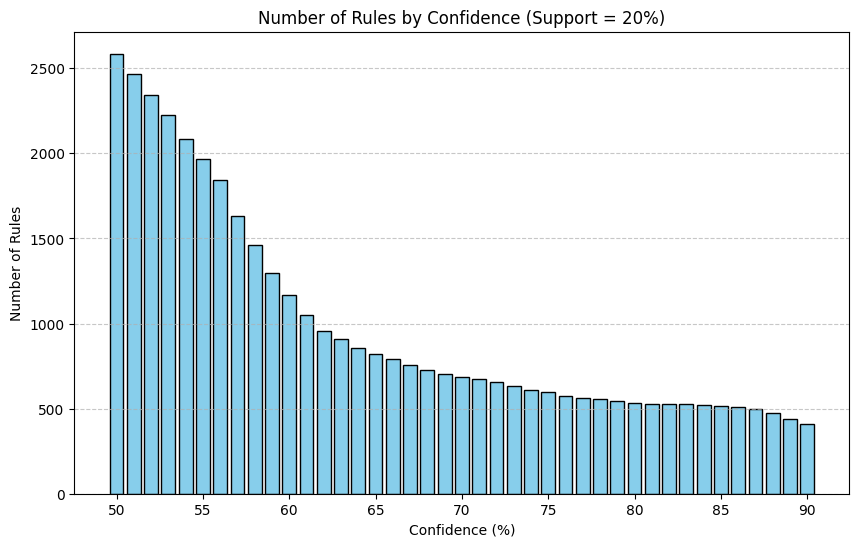

In [129]:
# Specifica il valore di supporto desiderato
specific_support = 20  # Modifica con il valore desiderato
support_index = specific_support - min_sup  # Calcola l'indice corrispondente nel range di supporto

# Prendi i dati per il supporto specificato
rules_per_conf = len_r[support_index]  # Estrae i numeri di regole per il supporto fissato


# Somma il numero di regole generate per ogni valore di confidenza
conf_values = list(range(min_conf, max_conf))

# Crea un istogramma
plt.figure(figsize=(10, 6))
plt.bar(conf_values, rules_per_conf, color='skyblue', edgecolor='black')
plt.xlabel("Confidence (%)")
plt.ylabel("Number of Rules")
# plt.title("Number of Rules by Confidence")
plt.title(f"Number of Rules by Confidence (Support = {specific_support}%)")  # Se si vuole specificare il supporto nel titolo 
# plt.xticks(conf_values, rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

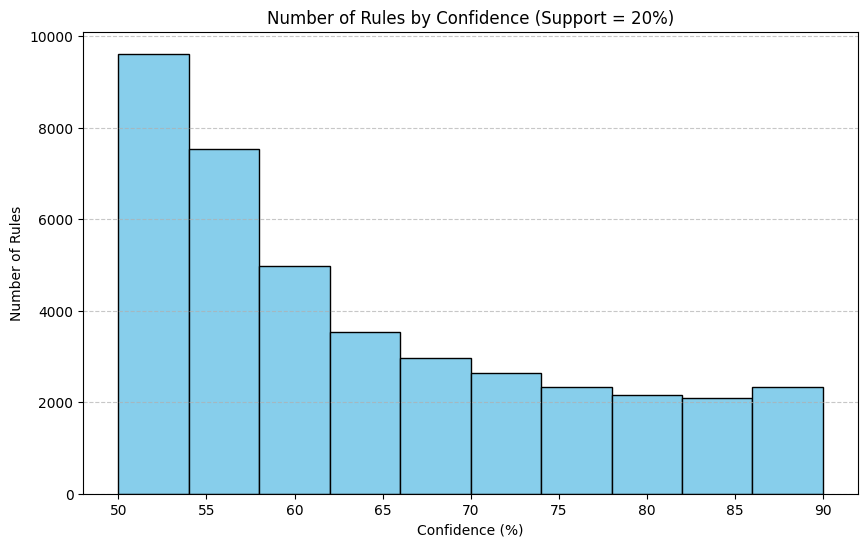

In [130]:
# Specifica il valore di supporto desiderato
specific_support = 20  # Modifica con il valore desiderato
support_index = specific_support - min_sup  # Calcola l'indice corrispondente nel range di supporto

# Prendi i dati per il supporto specificato
rules_per_conf = len_r[support_index]  # Estrae i numeri di regole per il supporto fissato

# Somma il numero di regole generate per ogni valore di confidenza
conf_values = list(range(min_conf, max_conf))

# Crea un istogramma
plt.figure(figsize=(10, 6))
# plt.hist(conf_values, weights=rules_per_conf, bins=len(conf_values), color='skyblue', edgecolor='black', rwidth=0.85)
plt.hist(conf_values, weights=rules_per_conf, color='skyblue', edgecolor='black')
plt.xlabel("Confidence (%)")
plt.ylabel("Number of Rules")
# plt.title("Number of Rules by Confidence")
plt.title(f"Number of Rules by Confidence (Support = {specific_support}%)")  # Se si vuole specificare il supporto nel titolo
# plt.xticks(conf_values, rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


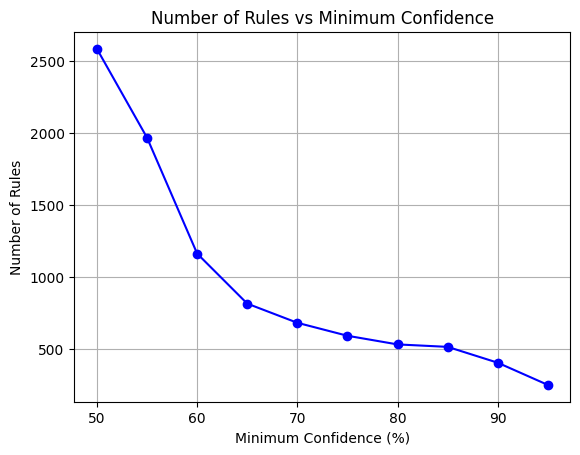

In [131]:
min_conf_values = range(50, 100, 5)  # Confidence minima dal 10% al 90%
num_rules = []

for conf in min_conf_values:
    rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
    num_rules.append(len(rules))

# Grafico
plt.plot(min_conf_values, num_rules, marker='o', color='blue')
plt.xlabel('Minimum Confidence (%)')
plt.ylabel('Number of Rules')
plt.title('Number of Rules vs Minimum Confidence')
plt.grid()
plt.show()


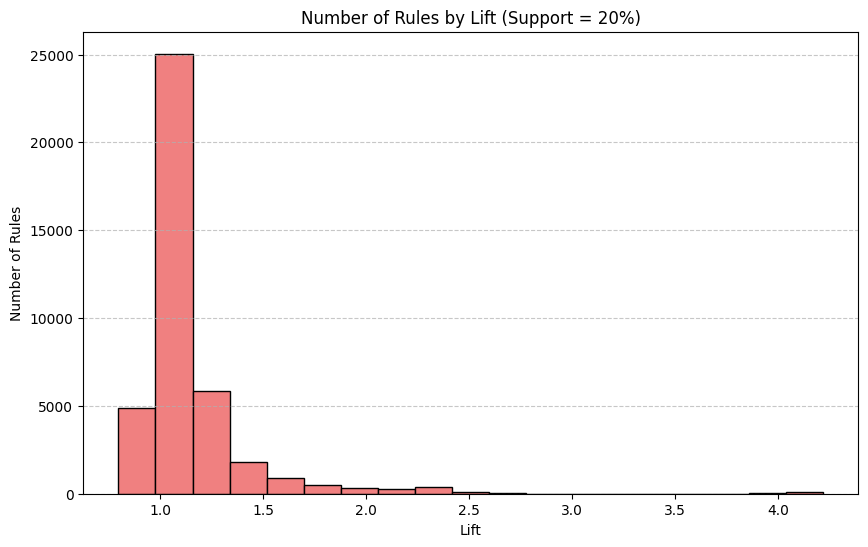

In [132]:
#  Genera le regole per il supporto e il range di confidenza specificato
rules_for_lift = []
for conf in range(min_conf, max_conf):
    rules = fpgrowth(X, target="r", supp=specific_support, zmin=zmin, conf=conf, report="aScl")
    rules_for_lift.extend(rules)  # Aggiungi tutte le regole generate per questo confidenza

# Estrai i valori di lift da tutte le regole generate
lift_values = [rule[5] for rule in rules_for_lift]  # Assumendo che il lift sia nell'indice 5

# Raggruppa i valori di lift in bin per l'istogramma
bins = np.linspace(min(lift_values), max(lift_values), 20)  # Dividi in 20 intervalli
lift_hist, bin_edges = np.histogram(lift_values, bins=bins)

# Crea l'istogramma
plt.figure(figsize=(10, 6))
plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # Usa il centro di ogni bin
    lift_hist,
    width=np.diff(bin_edges),
    color="lightcoral",
    edgecolor="black",
    align="center"
)
plt.xlabel("Lift")
plt.ylabel("Number of Rules")
plt.title(f"Number of Rules by Lift (Support = {specific_support}%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


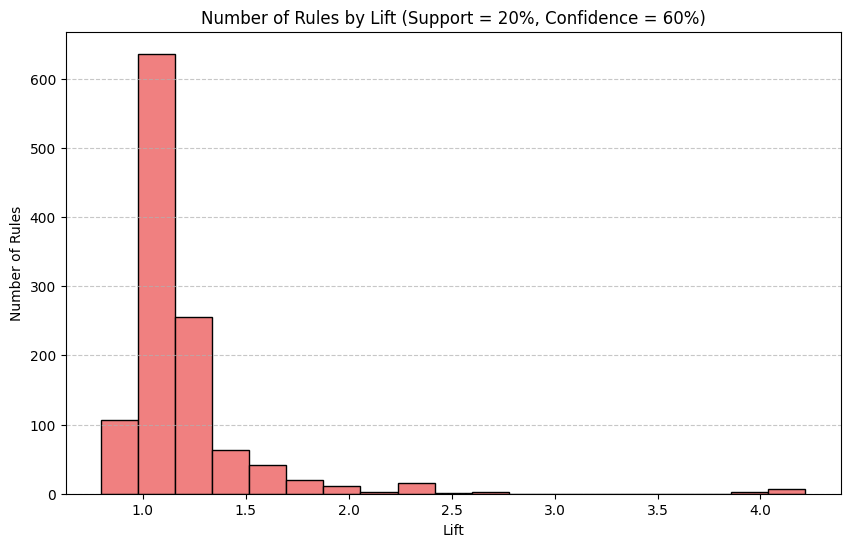

In [133]:
# Specifica il valore di confidenza desiderato
specific_conf = 60  # Modifica con il valore desiderato
specific_support = 20  # Modifica con il supporto desiderato

# Genera le regole per il supporto e il valore di confidenza specifico
rules_for_lift = fpgrowth(X, target="r", supp=specific_support, zmin=zmin, conf=specific_conf, report="aScl")

# Estrai i valori di lift da tutte le regole generate
lift_values = [rule[5] for rule in rules_for_lift]  # Assumendo che il lift sia nell'indice 5

# Raggruppa i valori di lift in bin per l'istogramma
bins = np.linspace(min(lift_values), max(lift_values), 20)  # Dividi in 20 intervalli
lift_hist, bin_edges = np.histogram(lift_values, bins=bins)

# Crea l'istogramma
plt.figure(figsize=(10, 6))
plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # Usa il centro di ogni bin
    lift_hist,
    width=np.diff(bin_edges),
    color="lightcoral",
    edgecolor="black",
    align="center"
)
plt.xlabel("Lift")
plt.ylabel("Number of Rules")
plt.title(f"Number of Rules by Lift (Support = {specific_support}%, Confidence = {specific_conf}%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Optimal Confidence Level: 50
   conf  num_rules  num_significant  avg_lift  std_lift  max_lift
0    50       1026               85  2.097148  0.595005  4.218225
1    55        760               65  2.113709  0.679374  4.218225
2    60        407               39  2.114202  0.826092  4.218225
3    65        257               22  2.127536  0.859711  4.218225
4    70        208               14  1.830226  0.162547  2.099072
5    75        167               10  1.816444  0.192346  2.099072
6    80        142                5  1.714810  0.231835  2.099072
7    85        137                3  1.579010  0.075737  1.665870
8    90        104                1  1.665870       NaN  1.665870
9    95         64                0  0.000000  0.000000  0.000000


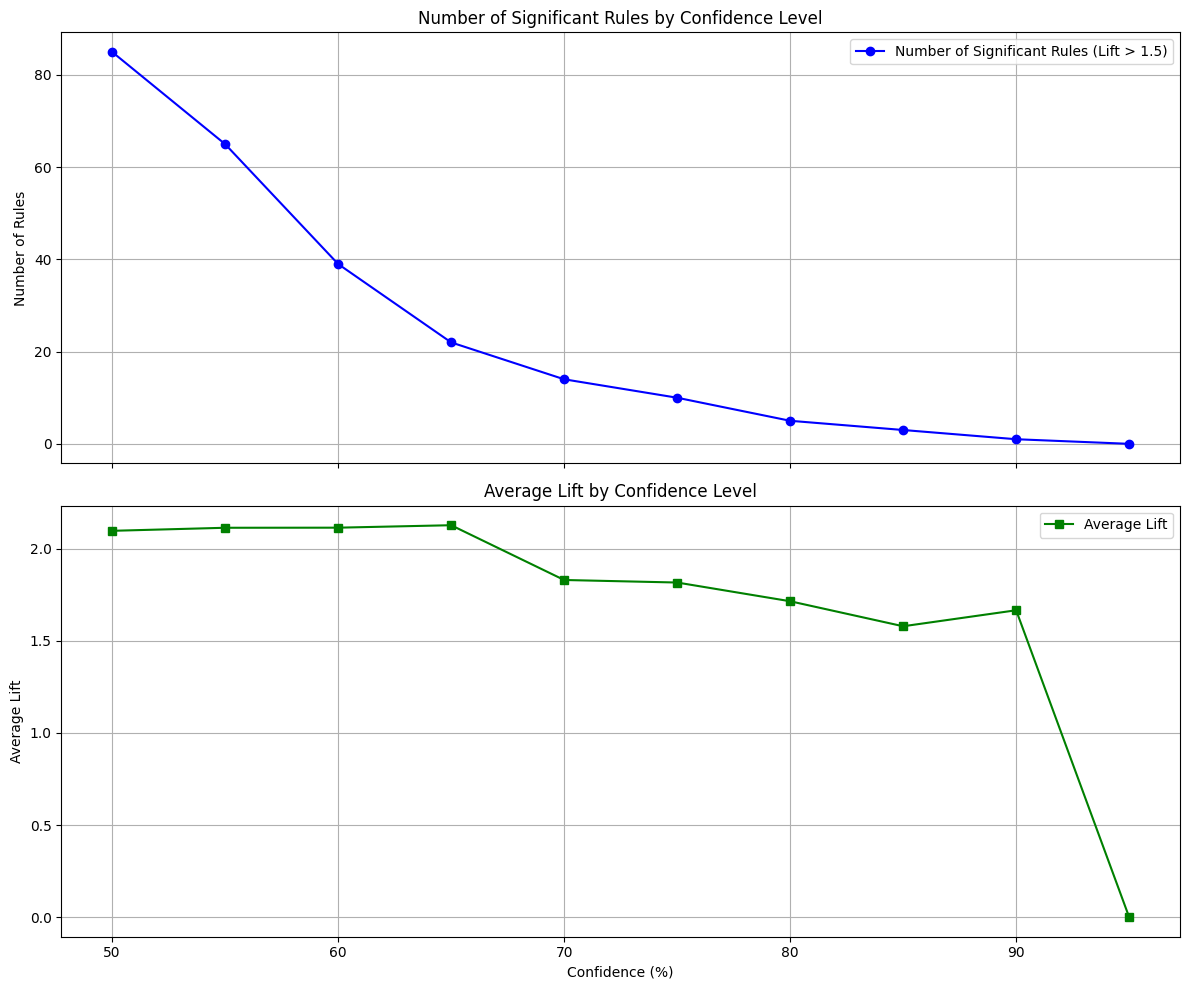

In [134]:
# Parametri
min_conf = 50
max_conf = 95
conf_step = 5
supp = 20  # Supporto fisso percentuale
zmin = 5   # Minimum itemset size

# Inizializza una lista per memorizzare i risultati
metrics_by_conf = []

# Ciclo sui valori di confidenza
for conf in range(min_conf, max_conf + 1, conf_step):
    # Genera le regole per il valore corrente di confidenza
    rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="lcs")
    # Converti le regole in DataFrame
    rules_df = pd.DataFrame(rules, columns=["consequent", "antecedent", "lift", "confidence", "support"])
    # Filtra le regole con lift > 1.5
    rules_significant = rules_df[rules_df["lift"] > 1.5]
    
    # Calcola le metriche
    num_rules = len(rules_df)  # Numero totale di regole
    num_significant = len(rules_significant)  # Numero di regole con lift > 1.5
    avg_lift = rules_significant["lift"].mean() if num_significant > 0 else 0
    std_lift = rules_significant["lift"].std() if num_significant > 0 else 0
    max_lift = rules_significant["lift"].max() if num_significant > 0 else 0
    
    # Aggiungi i risultati alla lista
    metrics_by_conf.append({
        "conf": conf,
        "num_rules": num_rules,
        "num_significant": num_significant,
        "avg_lift": avg_lift,
        "std_lift": std_lift,
        "max_lift": max_lift,
    })

# Converti i risultati in DataFrame per analisi
metrics_df = pd.DataFrame(metrics_by_conf)

# Trova il conf con il massimo numero di regole significative
optimal_conf = metrics_df.loc[metrics_df["num_significant"].idxmax(), "conf"]

# Visualizza i risultati
print(f"Optimal Confidence Level: {optimal_conf}")
print(metrics_df)

# Creazione di due subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Primo subplot: Numero di regole significative
axes[0].plot(metrics_df["conf"], metrics_df["num_significant"], label="Number of Significant Rules (Lift > 1.5)", marker='o', color='blue')
axes[0].set_ylabel("Number of Rules")
axes[0].set_title("Number of Significant Rules by Confidence Level")
axes[0].legend()
axes[0].grid()

# Secondo subplot: Media del lift
axes[1].plot(metrics_df["conf"], metrics_df["avg_lift"], label="Average Lift", marker='s', color='green')
axes[1].set_xlabel("Confidence (%)")
axes[1].set_ylabel("Average Lift")
axes[1].set_title("Average Lift by Confidence Level")
axes[1].legend()
axes[1].grid()

# Mostra il grafico
plt.tight_layout()
plt.show()



In [135]:
conf = 65
supp = 20  
zmin = 4

# Generazione delle regole
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

# Filtra le regole con lift > 1.5
rules_df = rules_df[rules_df["lift"] > 1.5]

# Ordina per lift decrescente
rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False)

# Configura l'opzione per visualizzare colonne intere
pd.set_option('display.max_colwidth', None)

# Converti il DataFrame in HTML scrollabile
from IPython.core.display import display, HTML
display(HTML(rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))

# Visualizza le dimensioni del DataFrame
rules_df.shape


C:\Users\tomma\AppData\Local\Temp\ipykernel_19368\3537926230.py:29: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


,consequent,antecedent,abs_support,%_support,confidence,lift
815,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, 1_country, no_adult)",2214,13.902669,0.654255,4.218225
816,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, 1_country)",2216,13.915228,0.654073,4.217051
814,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes, no_adult)",2285,14.348509,0.651926,4.203206
817,short,"((-0.001, 29.0]_minutes, genre_Comedy/Family, no_episodes)",2287,14.361068,0.651753,4.202089
799,movie,"((90.0, 570.0]_minutes, no_episodes, no_adult)",3333,20.929356,0.956385,2.480525
796,movie,"((90.0, 570.0]_minutes, 1_country, no_adult)",2902,18.222920,0.906026,2.349912
672,tvseries_related,"((29.0, 53.0]_minutes, 1_country, no_adult)",3610,22.668760,0.897340,2.311199
674,tvseries_related,"((29.0, 53.0]_minutes, no_episodes, no_adult)",2806,17.620094,0.863650,2.224427
647,movie,"((1.933, 24.333]_regions, No_reviews, no_episodes, no_adult)",2920,18.335950,0.809313,2.099072
655,movie,"((1.933, 24.333]_regions, No_reviews, no_episodes)",2954,18.549451,0.799892,2.074638


(58, 6)